In [1]:
#pip install fredpy


In [2]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Loading API key


In [3]:
fp.api_key = *******************

The goal of this project is to predit the corporate bond spreads. This notebook provides the code to create the dataframe required to train and run AI/ML models to predict the corporate bond spreads. The inputs used for predicting corporate bond spreads are SP 500, vix, slope(T10y-T2y spreads), skew, GDP, fed fund rate, inflation rate


# Downloading the required input data

The breakeven inflation rate represents a measure of expected inflation derived from 10-Year Treasury Constant Maturity Securities (BC_10YEAR) and 10-Year Treasury Inflation-Indexed Constant Maturity Securities (TC_10YEAR). The latest value implies what market participants expect inflation to be in the next 10 years, on average.
Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department.

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

The S&P CoreLogic Case-Shiller Home Price Indices are the leading measures of U.S. residential real estate prices, tracking changes in the value of residential real estate nationally.

The effective yield of the ICE BofA AAA US Corporate Index, a subset of the ICE BofA US Corporate Master Index tracking the performance of US dollar denominated investment grade rated corporate debt publicly issued in the US domestic market.

In [4]:
# Restrict observations from January 1, 2014 to 2023 with daily frequency
win = ['01-01-2014','01-01-2023']

sp500 = fp.series('SP500').window(win).as_frequency(freq='D')
vix = fp.series('VIXCLS').window(win).as_frequency(freq='D')
slope = fp.series('T10Y2Y').window(win).as_frequency(freq='D')
gdp = fp.series('GDP').window(win).as_frequency(freq='Q')
fedfund_rate = fp.series('DFF').window(win).as_frequency(freq='D')
breakeven_inflation_rate = fp.series('T10YIE').window(win).as_frequency(freq='D')
case_schiller_index = fp.series('CSUSHPINSA').window(win).as_frequency(freq='M')
cb_spreads = fp.series('BAMLC0A1CAAAEY').window(win).as_frequency(freq='D')
cpi = fp.series('CPIAUCSL').window(win).as_frequency(freq='M')

# Equalize the date ranges
[sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi] = fp.window_equalize([sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi])

# plotting the data


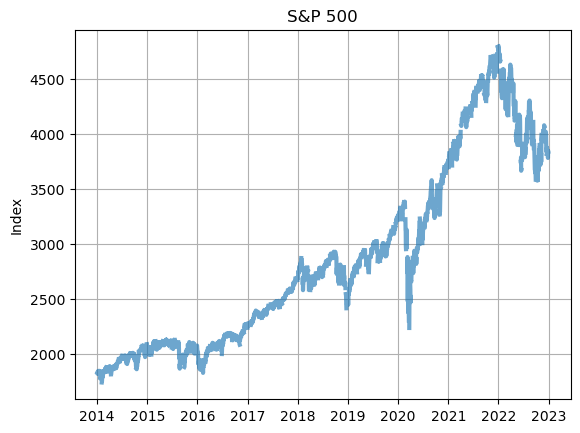

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sp500.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(sp500.title)
ax.set_ylabel(sp500.units);

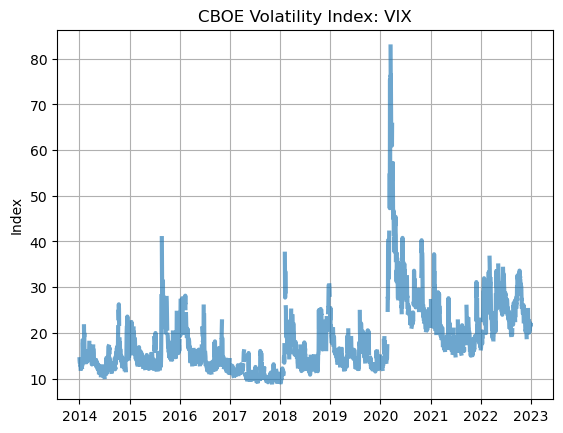

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vix.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(vix.title)
ax.set_ylabel(vix.units);

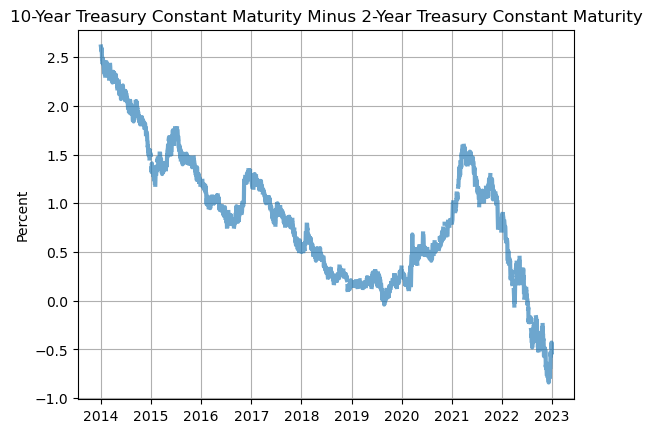

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(slope.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(slope.title)
ax.set_ylabel(slope.units);

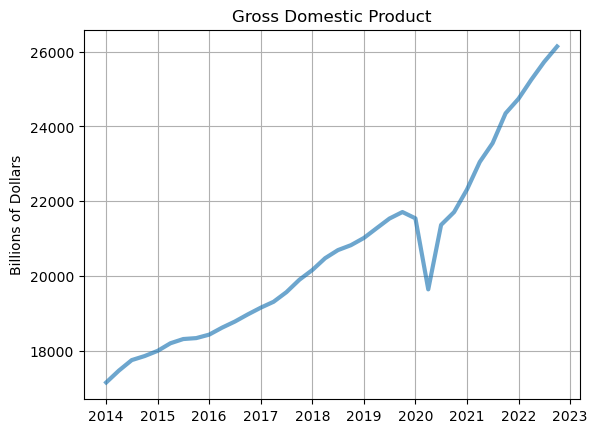

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);

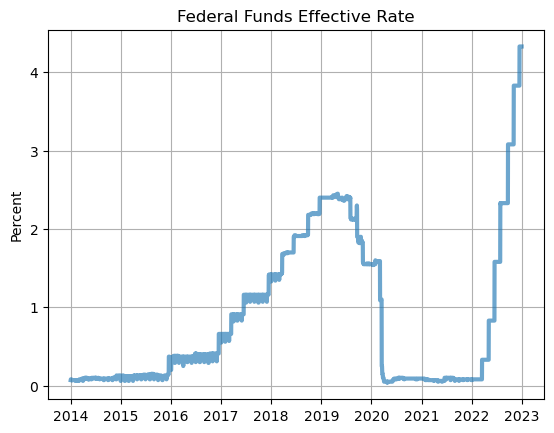

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fedfund_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(fedfund_rate.title)
ax.set_ylabel(fedfund_rate.units);

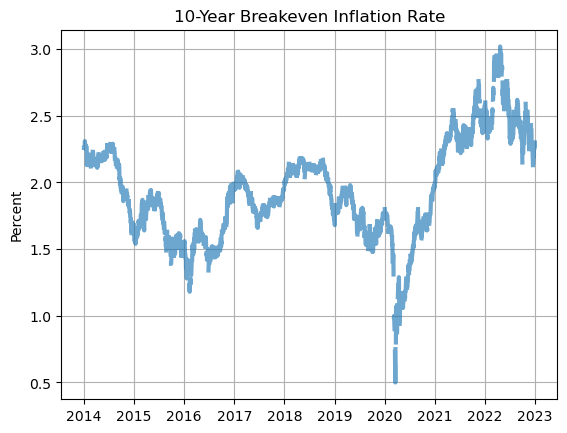

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(breakeven_inflation_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(breakeven_inflation_rate.title)
ax.set_ylabel(breakeven_inflation_rate.units);

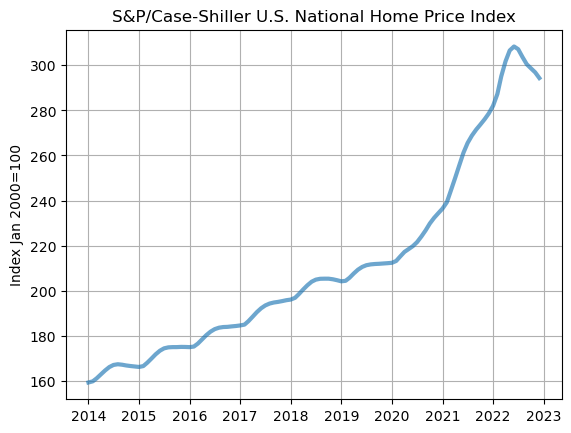

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(case_schiller_index.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(case_schiller_index.title)
ax.set_ylabel(case_schiller_index.units);

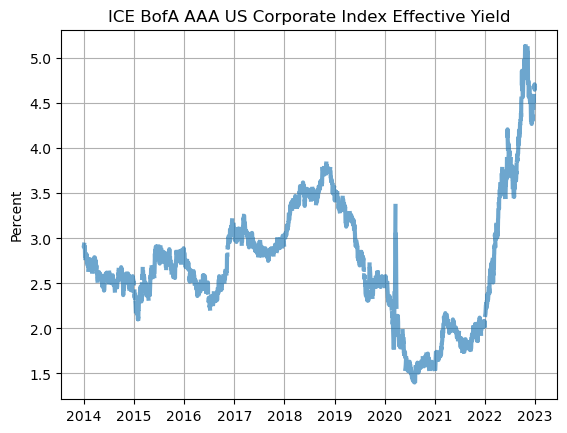

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cb_spreads.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cb_spreads.title)
ax.set_ylabel(cb_spreads.units);

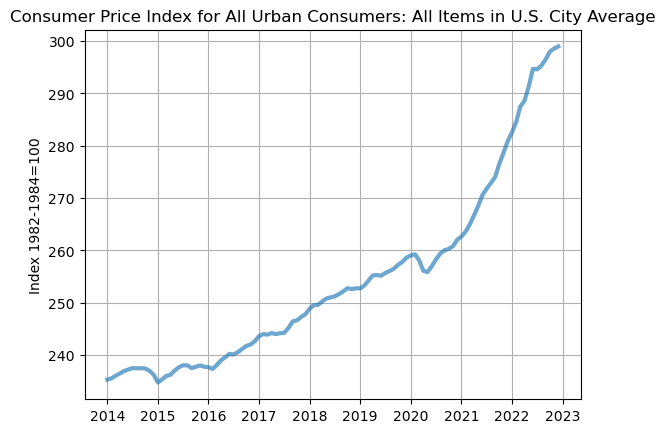

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cpi.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cpi.title)
ax.set_ylabel(cpi.units);

In [14]:
data = {'SP500': sp500.data,'Vix': vix.data, 'slope': slope.data,'GDP': gdp.data,'Fed fund rate': fedfund_rate.data, 'Breakeven inflation rate': breakeven_inflation_rate.data, 'House price index': case_schiller_index.data, 'US-AAA yield': cb_spreads.data,'CPI': cpi.data}


In [15]:
df = pd.DataFrame(data)
df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [16]:

df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [17]:
# interpolated dataframe
df = pd.DataFrame(data)
df['SP500']= np.log(df['SP500'] / df['SP500'].shift())
df = df.interpolate(method='linear', axis=0).ffill().bfill()
df.head()

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,-0.000333,14.23,2.610000,17144.281000,0.07,2.26,159.370000,2.92,235.288000
2014-01-02,-0.000333,14.23,2.610000,17147.819022,0.08,2.26,159.386226,2.92,235.296355
2014-01-03,-0.000333,13.76,2.600000,17151.357044,0.08,2.26,159.402452,2.93,235.304710
2014-01-04,0.001266,13.69,2.593333,17154.895067,0.08,2.26,159.418677,2.92,235.313065
2014-01-05,0.002865,13.62,2.586667,17158.433089,0.08,2.26,159.434903,2.91,235.321419


<Axes: xlabel='date'>

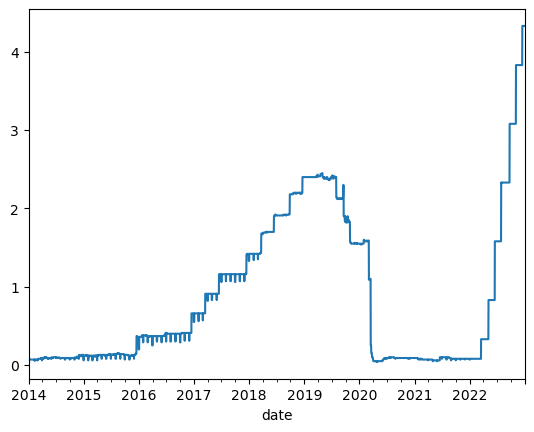

In [18]:
df["Fed fund rate"].plot()

<Axes: xlabel='date'>

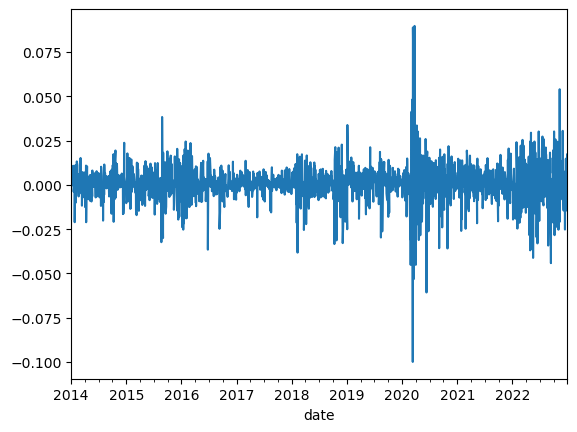

In [19]:
df["SP500"].plot()

# Linear regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['SP500','Vix','slope','GDP','Fed fund rate','Breakeven inflation rate','House price index','CPI']]
y = df['US-AAA yield']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [22]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 9.268948549160788
betas = [-5.92261566e-01  8.07740278e-03 -2.06935847e-01 -8.06589251e-04
  7.76652159e-01  1.04801290e+00  3.75416789e-02 -1.64736417e-03]


In [23]:
Y_predicted = model.predict(X)

In [24]:
df['US-AAA yield OLS predicted' ] = Y_predicted

<Axes: xlabel='date'>

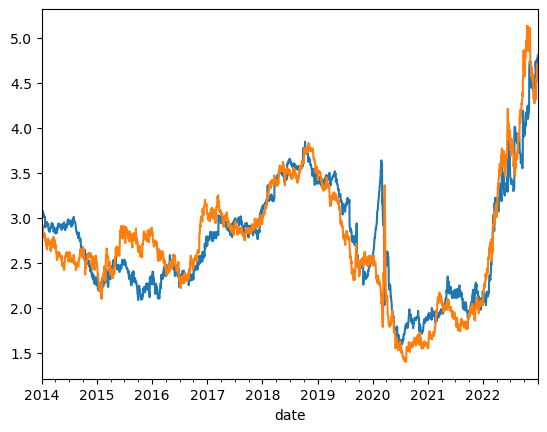

In [25]:
df["US-AAA yield OLS predicted"].plot()
df["US-AAA yield"].plot()


# Ai models

In [26]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, Nadam
import xgboost as xgb

2023-08-10 08:03:48.255596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
df_univariate = df["US-AAA yield"]

In [28]:
train, validate, test = np.split(df_univariate.sample(frac=1, random_state=None), [int(.8*len(df)), int(.9*len(df))])

In [29]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [30]:
n_steps = 30

# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)


In [31]:
print(X_train)
print(Y_train)

[[2.5        3.51       2.065      ... 2.82       3.05       1.61      ]
 [3.51       2.065      3.47       ... 3.05       1.61       2.77666667]
 [2.065      3.47       2.42       ... 1.61       2.77666667 3.15      ]
 ...
 [2.62       3.         3.66       ... 2.86333333 3.53       2.89      ]
 [3.         3.66       2.95       ... 3.53       2.89       3.45333333]
 [3.66       2.95       1.61       ... 2.89       3.45333333 2.81333333]]
[2.77666667 3.15       2.35333333 ... 3.45333333 2.81333333 2.52      ]


In [32]:
n_features = 1

# define model
model = Sequential()
model.add(InputLayer((n_steps, n_features)))
model.add(GRU(64))
model.add(Dense(n_steps,'relu'))
model.add(Dense(1,'linear'))

model.summary()

2023-08-10 08:03:52.319372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 14,845
Trainable params: 14,845
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300,  verbose=1, shuffle=False)

Epoch 1/300
82/82 [==============================] - 2s 11ms/step - loss: 4.8641 - root_mean_squared_error: 2.2055 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7031
Epoch 2/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4796 - root_mean_squared_error: 0.6925 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6991
Epoch 3/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4710 - root_mean_squared_error: 0.6863 - val_loss: 0.4883 - val_root_mean_squared_error: 0.6988
Epoch 4/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4711 - root_mean_squared_error: 0.6864 - val_loss: 0.4880 - val_root_mean_squared_error: 0.6986
Epoch 5/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4712 - root_mean_squared_error: 0.6865 - val_loss: 0.4878 - val_root_mean_squared_error: 0.6984
Epoch 6/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4713 - root_mean_squared_error: 0.6865 - val_loss: 0.4877 - val_root_

Epoch 49/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4713 - root_mean_squared_error: 0.6865 - val_loss: 0.4886 - val_root_mean_squared_error: 0.6990
Epoch 50/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4712 - root_mean_squared_error: 0.6865 - val_loss: 0.4886 - val_root_mean_squared_error: 0.6990
Epoch 51/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4712 - root_mean_squared_error: 0.6865 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6990
Epoch 52/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4712 - root_mean_squared_error: 0.6865 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6991
Epoch 53/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4712 - root_mean_squared_error: 0.6864 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6991
Epoch 54/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4712 - root_mean_squared_error: 0.6864 - val_loss: 0.4887 - val_

82/82 [==============================] - 1s 7ms/step - loss: 0.4707 - root_mean_squared_error: 0.6861 - val_loss: 0.4898 - val_root_mean_squared_error: 0.6999
Epoch 97/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4707 - root_mean_squared_error: 0.6861 - val_loss: 0.4898 - val_root_mean_squared_error: 0.6999
Epoch 98/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4707 - root_mean_squared_error: 0.6861 - val_loss: 0.4899 - val_root_mean_squared_error: 0.6999
Epoch 99/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4707 - root_mean_squared_error: 0.6860 - val_loss: 0.4899 - val_root_mean_squared_error: 0.7000
Epoch 100/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4706 - root_mean_squared_error: 0.6860 - val_loss: 0.4900 - val_root_mean_squared_error: 0.7000
Epoch 101/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4706 - root_mean_squared_error: 0.6860 - val_loss: 0.4900 - val_root_mean_s

82/82 [==============================] - 1s 7ms/step - loss: 0.4699 - root_mean_squared_error: 0.6855 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7017
Epoch 144/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4699 - root_mean_squared_error: 0.6855 - val_loss: 0.4924 - val_root_mean_squared_error: 0.7017
Epoch 145/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4699 - root_mean_squared_error: 0.6855 - val_loss: 0.4924 - val_root_mean_squared_error: 0.7017
Epoch 146/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4698 - root_mean_squared_error: 0.6854 - val_loss: 0.4925 - val_root_mean_squared_error: 0.7018
Epoch 147/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4698 - root_mean_squared_error: 0.6854 - val_loss: 0.4925 - val_root_mean_squared_error: 0.7018
Epoch 148/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4697 - root_mean_squared_error: 0.6854 - val_loss: 0.4926 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.4668 - root_mean_squared_error: 0.6832 - val_loss: 0.4942 - val_root_mean_squared_error: 0.7030
Epoch 191/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4668 - root_mean_squared_error: 0.6832 - val_loss: 0.4942 - val_root_mean_squared_error: 0.7030
Epoch 192/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4667 - root_mean_squared_error: 0.6832 - val_loss: 0.4943 - val_root_mean_squared_error: 0.7031
Epoch 193/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4667 - root_mean_squared_error: 0.6831 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7031
Epoch 194/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4666 - root_mean_squared_error: 0.6831 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7032
Epoch 195/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4666 - root_mean_squared_error: 0.6831 - val_loss: 0.4945 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.4588 - root_mean_squared_error: 0.6774 - val_loss: 0.5026 - val_root_mean_squared_error: 0.7089
Epoch 238/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4603 - root_mean_squared_error: 0.6785 - val_loss: 0.5022 - val_root_mean_squared_error: 0.7087
Epoch 239/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4582 - root_mean_squared_error: 0.6769 - val_loss: 0.5006 - val_root_mean_squared_error: 0.7076
Epoch 240/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4579 - root_mean_squared_error: 0.6766 - val_loss: 0.5012 - val_root_mean_squared_error: 0.7079
Epoch 241/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4575 - root_mean_squared_error: 0.6764 - val_loss: 0.5017 - val_root_mean_squared_error: 0.7083
Epoch 242/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4570 - root_mean_squared_error: 0.6760 - val_loss: 0.5019 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.4305 - root_mean_squared_error: 0.6562 - val_loss: 0.5388 - val_root_mean_squared_error: 0.7340
Epoch 285/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4401 - root_mean_squared_error: 0.6634 - val_loss: 0.5374 - val_root_mean_squared_error: 0.7331
Epoch 286/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4283 - root_mean_squared_error: 0.6545 - val_loss: 0.5365 - val_root_mean_squared_error: 0.7325
Epoch 287/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4254 - root_mean_squared_error: 0.6522 - val_loss: 0.5339 - val_root_mean_squared_error: 0.7307
Epoch 288/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4240 - root_mean_squared_error: 0.6512 - val_loss: 0.5445 - val_root_mean_squared_error: 0.7379
Epoch 289/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4243 - root_mean_squared_error: 0.6514 - val_loss: 0.5394 - val_root_mea

In [34]:
# demonstrate prediction
Y_hat = model.predict(X_validate, verbose=0)


In [35]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,2.966371,3.406667
1,2.644982,2.540000
2,2.736118,3.420000
3,2.563917,3.503333
4,2.732405,2.710000
...,...,...
294,2.307606,2.940000
295,2.368452,3.400000
296,2.436105,2.330000
297,2.636396,3.340000


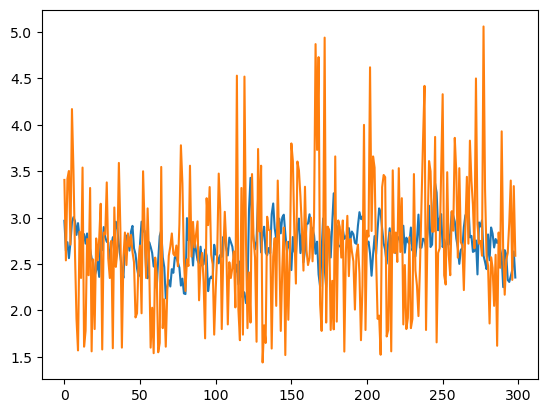

In [36]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [37]:
n_steps = 30
# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)

In [38]:
n_features = 1

# define model
model1 = Sequential()
model1.add(InputLayer((n_steps, n_features)))
model1.add(Conv1D(64,kernel_size=2))
model1.add(Flatten())
model1.add(Dense(n_steps,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 flatten (Flatten)           (None, 1856)              0         
                                                                 
 dense_2 (Dense)             (None, 30)                55710     
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 55,933
Trainable params: 55,933
Non-trainable params: 0
_________________________________________________________________


In [39]:
model1.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 1s 2ms/step - loss: 0.7226 - root_mean_squared_error: 0.8500 - val_loss: 0.5275 - val_root_mean_squared_error: 0.7263
Epoch 2/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4904 - root_mean_squared_error: 0.7003 - val_loss: 0.5261 - val_root_mean_squared_error: 0.7253
Epoch 3/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4906 - root_mean_squared_error: 0.7004 - val_loss: 0.5328 - val_root_mean_squared_error: 0.7299
Epoch 4/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4903 - root_mean_squared_error: 0.7002 - val_loss: 0.5330 - val_root_mean_squared_error: 0.7301
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4894 - root_mean_squared_error: 0.6996 - val_loss: 0.5317 - val_root_mean_squared_error: 0.7292
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4896 - root_mean_squared_error: 0.6997 - val_loss: 0.5303 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4851 - root_mean_squared_error: 0.6965 - val_loss: 0.5012 - val_root_mean_squared_error: 0.7079
Epoch 50/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4838 - root_mean_squared_error: 0.6955 - val_loss: 0.5024 - val_root_mean_squared_error: 0.7088
Epoch 51/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4821 - root_mean_squared_error: 0.6943 - val_loss: 0.5029 - val_root_mean_squared_error: 0.7092
Epoch 52/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4808 - root_mean_squared_error: 0.6934 - val_loss: 0.5031 - val_root_mean_squared_error: 0.7093
Epoch 53/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4798 - root_mean_squared_error: 0.6927 - val_loss: 0.5030 - val_root_mean_squared_error: 0.7092
Epoch 54/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4791 - root_mean_squared_error: 0.6922 - val_loss: 0.5029 - val_

82/82 [==============================] - 0s 1ms/step - loss: 0.4726 - root_mean_squared_error: 0.6875 - val_loss: 0.4949 - val_root_mean_squared_error: 0.7035
Epoch 97/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4722 - root_mean_squared_error: 0.6872 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7031
Epoch 98/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4719 - root_mean_squared_error: 0.6869 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7031
Epoch 99/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4711 - root_mean_squared_error: 0.6864 - val_loss: 0.4938 - val_root_mean_squared_error: 0.7027
Epoch 100/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4706 - root_mean_squared_error: 0.6860 - val_loss: 0.4938 - val_root_mean_squared_error: 0.7027
Epoch 101/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4700 - root_mean_squared_error: 0.6856 - val_loss: 0.4928 - val_root_mean_s

82/82 [==============================] - 0s 1ms/step - loss: 0.4593 - root_mean_squared_error: 0.6777 - val_loss: 0.5055 - val_root_mean_squared_error: 0.7110
Epoch 144/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4591 - root_mean_squared_error: 0.6775 - val_loss: 0.5055 - val_root_mean_squared_error: 0.7110
Epoch 145/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4589 - root_mean_squared_error: 0.6774 - val_loss: 0.5056 - val_root_mean_squared_error: 0.7111
Epoch 146/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4587 - root_mean_squared_error: 0.6773 - val_loss: 0.5056 - val_root_mean_squared_error: 0.7111
Epoch 147/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4585 - root_mean_squared_error: 0.6771 - val_loss: 0.5053 - val_root_mean_squared_error: 0.7109
Epoch 148/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4583 - root_mean_squared_error: 0.6770 - val_loss: 0.5076 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4460 - root_mean_squared_error: 0.6678 - val_loss: 0.5077 - val_root_mean_squared_error: 0.7125
Epoch 191/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4454 - root_mean_squared_error: 0.6674 - val_loss: 0.5083 - val_root_mean_squared_error: 0.7129
Epoch 192/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4450 - root_mean_squared_error: 0.6671 - val_loss: 0.5082 - val_root_mean_squared_error: 0.7129
Epoch 193/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4445 - root_mean_squared_error: 0.6667 - val_loss: 0.5085 - val_root_mean_squared_error: 0.7131
Epoch 194/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4439 - root_mean_squared_error: 0.6663 - val_loss: 0.5098 - val_root_mean_squared_error: 0.7140
Epoch 195/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4436 - root_mean_squared_error: 0.6661 - val_loss: 0.5097 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4366 - root_mean_squared_error: 0.6608 - val_loss: 0.5067 - val_root_mean_squared_error: 0.7118
Epoch 238/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4362 - root_mean_squared_error: 0.6604 - val_loss: 0.5058 - val_root_mean_squared_error: 0.7112
Epoch 239/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4360 - root_mean_squared_error: 0.6603 - val_loss: 0.5059 - val_root_mean_squared_error: 0.7113
Epoch 240/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4360 - root_mean_squared_error: 0.6603 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7111
Epoch 241/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4355 - root_mean_squared_error: 0.6599 - val_loss: 0.5057 - val_root_mean_squared_error: 0.7111
Epoch 242/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4356 - root_mean_squared_error: 0.6600 - val_loss: 0.5056 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4310 - root_mean_squared_error: 0.6565 - val_loss: 0.5068 - val_root_mean_squared_error: 0.7119
Epoch 285/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4308 - root_mean_squared_error: 0.6563 - val_loss: 0.5072 - val_root_mean_squared_error: 0.7122
Epoch 286/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4307 - root_mean_squared_error: 0.6562 - val_loss: 0.5065 - val_root_mean_squared_error: 0.7117
Epoch 287/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4307 - root_mean_squared_error: 0.6562 - val_loss: 0.5067 - val_root_mean_squared_error: 0.7118
Epoch 288/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4306 - root_mean_squared_error: 0.6562 - val_loss: 0.5065 - val_root_mean_squared_error: 0.7117
Epoch 289/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4305 - root_mean_squared_error: 0.6561 - val_loss: 0.5067 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4262 - root_mean_squared_error: 0.6529 - val_loss: 0.5067 - val_root_mean_squared_error: 0.7118
Epoch 332/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4260 - root_mean_squared_error: 0.6527 - val_loss: 0.5061 - val_root_mean_squared_error: 0.7114
Epoch 333/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4259 - root_mean_squared_error: 0.6526 - val_loss: 0.5061 - val_root_mean_squared_error: 0.7114
Epoch 334/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4256 - root_mean_squared_error: 0.6524 - val_loss: 0.5067 - val_root_mean_squared_error: 0.7118
Epoch 335/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4257 - root_mean_squared_error: 0.6524 - val_loss: 0.5067 - val_root_mean_squared_error: 0.7118
Epoch 336/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4253 - root_mean_squared_error: 0.6522 - val_loss: 0.5074 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4208 - root_mean_squared_error: 0.6487 - val_loss: 0.5176 - val_root_mean_squared_error: 0.7195
Epoch 379/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4209 - root_mean_squared_error: 0.6488 - val_loss: 0.5213 - val_root_mean_squared_error: 0.7220
Epoch 380/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4209 - root_mean_squared_error: 0.6488 - val_loss: 0.5212 - val_root_mean_squared_error: 0.7219
Epoch 381/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4203 - root_mean_squared_error: 0.6483 - val_loss: 0.5207 - val_root_mean_squared_error: 0.7216
Epoch 382/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4202 - root_mean_squared_error: 0.6482 - val_loss: 0.5219 - val_root_mean_squared_error: 0.7224
Epoch 383/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4199 - root_mean_squared_error: 0.6480 - val_loss: 0.5219 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4070 - root_mean_squared_error: 0.6379 - val_loss: 0.5352 - val_root_mean_squared_error: 0.7316
Epoch 426/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4068 - root_mean_squared_error: 0.6378 - val_loss: 0.5345 - val_root_mean_squared_error: 0.7311
Epoch 427/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4070 - root_mean_squared_error: 0.6380 - val_loss: 0.5362 - val_root_mean_squared_error: 0.7323
Epoch 428/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4069 - root_mean_squared_error: 0.6379 - val_loss: 0.5357 - val_root_mean_squared_error: 0.7319
Epoch 429/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4068 - root_mean_squared_error: 0.6378 - val_loss: 0.5360 - val_root_mean_squared_error: 0.7321
Epoch 430/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4066 - root_mean_squared_error: 0.6376 - val_loss: 0.5351 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4005 - root_mean_squared_error: 0.6329 - val_loss: 0.5404 - val_root_mean_squared_error: 0.7351
Epoch 473/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4006 - root_mean_squared_error: 0.6329 - val_loss: 0.5398 - val_root_mean_squared_error: 0.7347
Epoch 474/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4005 - root_mean_squared_error: 0.6328 - val_loss: 0.5403 - val_root_mean_squared_error: 0.7351
Epoch 475/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4002 - root_mean_squared_error: 0.6326 - val_loss: 0.5397 - val_root_mean_squared_error: 0.7346
Epoch 476/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4001 - root_mean_squared_error: 0.6325 - val_loss: 0.5406 - val_root_mean_squared_error: 0.7353
Epoch 477/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4003 - root_mean_squared_error: 0.6327 - val_loss: 0.5409 - val_root_mea

In [40]:
# demonstrate prediction
Y_hat1 = model1.predict(X_validate, verbose=0)


In [41]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat1.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,2.601102,3.406667
1,2.463284,2.540000
2,2.749737,3.420000
3,3.217802,3.503333
4,2.510200,2.710000
...,...,...
294,2.860718,2.940000
295,3.034348,3.400000
296,2.566565,2.330000
297,2.809149,3.340000


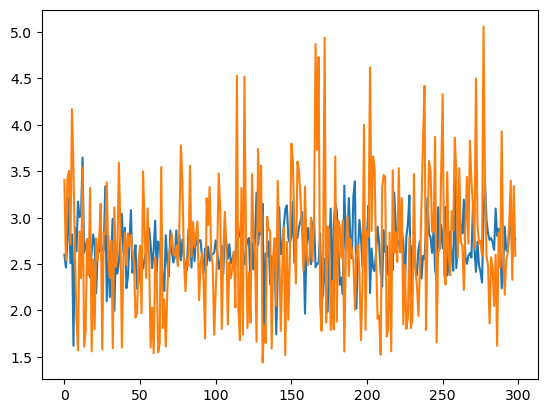

In [42]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

##  Multivariate regression


In [43]:
df1=df[['SP500','Vix','slope',  'GDP','Fed fund rate',  'CPI',  'US-AAA yield']] #Breakeven inflation rate',  'House price index', 'CPI' 'US-AAA yield']

In [44]:
def df_to_X_y2(df,window_size):
    df_as_np = df
    X = []
    Y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][6]
        Y.append(label)

    return np.array(X), np.array(Y)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# input scaling
scaler_input = StandardScaler()
scaler_input.fit(df1)
df_scaled_input = scaler_input.transform(df1)
print(df_scaled_input)

# output scaling
scaler_output = StandardScaler()
scaler_output.fit(df1[["US-AAA yield"]])
df_scaled_output = scaler_output.transform(df1[["US-AAA yield"]])
print(df_scaled_output)


[[-0.08497256 -0.53050313  2.62586511 ... -0.83384085 -1.08724304
   0.27460134]
 [-0.08497256 -0.53050313  2.62586511 ... -0.82328822 -1.08677045
   0.27460134]
 [-0.08497256 -0.59261133  2.61093184 ... -0.82328822 -1.08629786
   0.28912686]
 ...
 [-1.27240151  0.51476475 -1.91384898 ...  3.6615797   2.51603153
   2.87466991]
 [ 1.69647338  0.42226317 -2.03331514 ...  3.6615797   2.51603153
   2.78751677]
 [-0.30820697  0.45265655 -2.06318168 ...  3.6615797   2.51603153
   2.81656782]]
[[0.27460134]
 [0.27460134]
 [0.28912686]
 ...
 [2.87466991]
 [2.78751677]
 [2.81656782]]


In [47]:
df_scaled_input
n_steps = 16

In [48]:
x,y = df_to_X_y2(df_scaled_input,n_steps)
x.shape, y.shape

((3270, 16, 7), (3270,))

In [49]:
def train_test_validate_split(x,y):
    data_len = x.shape[0]
    train_len = int(0.8*data_len)
    test_len  = int(0.9*data_len)

    x_train, y_train = x[:train_len], y[:train_len]
    x_val, y_val = x[train_len:test_len], y[train_len:test_len]
    x_test, y_test = x[test_len:],y[test_len:]

    return x_train, y_train,x_test, y_test,x_val, y_val

In [50]:
x.shape[0]

3270

In [51]:
x_train, y_train,x_test, y_test,x_val, y_val = train_test_validate_split(x,y)

## GRU model


In [52]:
n_features = 7

# define model
model_gru = Sequential()
model_gru.add(InputLayer((n_steps, n_features)))
model_gru.add(GRU(64))
model_gru.add(Dense(n_steps,'relu'))
model_gru.add(Dense(1,'linear'))

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                14016     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,073
Trainable params: 15,073
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_gru.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.gru"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


callbacks_list = [checkpoint]

# fit model
model_gru.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, callbacks=callbacks_list, verbose=1, shuffle=False)

Epoch 1/500
74/82 [==========================>...] - ETA: 0s - loss: 0.3108 - root_mean_squared_error: 0.5575
Epoch 1: val_loss improved from inf to 0.55619, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 6s 59ms/step - loss: 0.4583 - root_mean_squared_error: 0.6770 - val_loss: 0.5562 - val_root_mean_squared_error: 0.7458
Epoch 2/500
77/82 [===========================>..] - ETA: 0s - loss: 0.2432 - root_mean_squared_error: 0.4931
Epoch 2: val_loss improved from 0.55619 to 0.29712, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.2807 - root_mean_squared_error: 0.5298 - val_loss: 0.2971 - val_root_mean_squared_error: 0.5451
Epoch 3/500
76/82 [==========================>...] - ETA: 0s - loss: 0.1604 - root_mean_squared_error: 0.4005
Epoch 3: val_loss improved from 0.29712 to 0.11901, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.1801 - root_mean_squared_error: 0.4243 - val_loss: 0.1190 - val_root_mean_squared_error: 0.3450
Epoch 4/500
81/82 [============================>.] - ETA: 0s - loss: 0.1149 - root_mean_squared_error: 0.3390
Epoch 4: val_loss improved from 0.11901 to 0.04490, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.1139 - root_mean_squared_error: 0.3375 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2119
Epoch 5/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0771 - root_mean_squared_error: 0.2777
Epoch 5: val_loss did not improve from 0.04490
82/82 [==============================] - 0s 5ms/step - loss: 0.0755 - root_mean_squared_error: 0.2747 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2405
Epoch 6/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0569 - root_mean_squared_error: 0.2385
Epoch 6: val_loss did not improve from 0.04490
82/82 [==============================] - 0s 5ms/step - loss: 0.0526 - root_mean_squared_error: 0.2293 - val_loss: 0.0935 - val_root_mean_squared_error: 0.3058
Epoch 7/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0391 - root_mean_squared_error: 0.1977
Epoch 7: val_loss did not improve from 0.04490
82/82 [==============================] - 0s 5ms/ste

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0071 - root_mean_squared_error: 0.0844 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2107
Epoch 25/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0832
Epoch 25: val_loss improved from 0.04439 to 0.04292, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0069 - root_mean_squared_error: 0.0831 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2072
Epoch 26/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0820
Epoch 26: val_loss improved from 0.04292 to 0.04171, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0067 - root_mean_squared_error: 0.0819 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2042
Epoch 27/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0809
Epoch 27: val_loss improved from 0.04171 to 0.04048, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0065 - root_mean_squared_error: 0.0807 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2012
Epoch 28/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0797
Epoch 28: val_loss improved from 0.04048 to 0.03926, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0063 - root_mean_squared_error: 0.0795 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1981
Epoch 29/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0786
Epoch 29: val_loss improved from 0.03926 to 0.03807, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0061 - root_mean_squared_error: 0.0784 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1951
Epoch 30/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0775
Epoch 30: val_loss improved from 0.03807 to 0.03689, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0060 - root_mean_squared_error: 0.0773 - val_loss: 0.0369 - val_root_mean_squared_error: 0.1921
Epoch 31/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0765
Epoch 31: val_loss improved from 0.03689 to 0.03582, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1893
Epoch 32/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0755
Epoch 32: val_loss improved from 0.03582 to 0.03455, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0057 - root_mean_squared_error: 0.0752 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1859
Epoch 33/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0745
Epoch 33: val_loss improved from 0.03455 to 0.03347, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1829
Epoch 34/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0735
Epoch 34: val_loss improved from 0.03347 to 0.03226, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0323 - val_root_mean_squared_error: 0.1796
Epoch 35/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0726
Epoch 35: val_loss improved from 0.03226 to 0.03109, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0052 - root_mean_squared_error: 0.0722 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1763
Epoch 36/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0717
Epoch 36: val_loss improved from 0.03109 to 0.03001, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1732
Epoch 37/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0709
Epoch 37: val_loss improved from 0.03001 to 0.02889, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1700
Epoch 38/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0700
Epoch 38: val_loss improved from 0.02889 to 0.02785, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0048 - root_mean_squared_error: 0.0696 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1669
Epoch 39/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0692
Epoch 39: val_loss improved from 0.02785 to 0.02684, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0047 - root_mean_squared_error: 0.0687 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1638
Epoch 40/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0684
Epoch 40: val_loss improved from 0.02684 to 0.02597, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1611
Epoch 41/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0677
Epoch 41: val_loss improved from 0.02597 to 0.02502, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1582
Epoch 42/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0670
Epoch 42: val_loss improved from 0.02502 to 0.02420, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0044 - root_mean_squared_error: 0.0665 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1556
Epoch 43/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0663
Epoch 43: val_loss improved from 0.02420 to 0.02340, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1530
Epoch 44/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0657
Epoch 44: val_loss improved from 0.02340 to 0.02265, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0042 - root_mean_squared_error: 0.0652 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1505
Epoch 45/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0651
Epoch 45: val_loss improved from 0.02265 to 0.02195, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0042 - root_mean_squared_error: 0.0645 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1482
Epoch 46/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0645
Epoch 46: val_loss improved from 0.02195 to 0.02127, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0041 - root_mean_squared_error: 0.0639 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1458
Epoch 47/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 47: val_loss improved from 0.02127 to 0.02072, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0040 - root_mean_squared_error: 0.0634 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1439
Epoch 48/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0633
Epoch 48: val_loss improved from 0.02072 to 0.02012, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 49/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0628
Epoch 49: val_loss improved from 0.02012 to 0.01967, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1403
Epoch 50/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0622
Epoch 50: val_loss improved from 0.01967 to 0.01907, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381
Epoch 51/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0618
Epoch 51: val_loss improved from 0.01907 to 0.01875, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1369
Epoch 52/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0611
Epoch 52: val_loss improved from 0.01875 to 0.01825, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1351
Epoch 53/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0608
Epoch 53: val_loss improved from 0.01825 to 0.01806, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0036 - root_mean_squared_error: 0.0603 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1344
Epoch 54/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0601
Epoch 54: val_loss improved from 0.01806 to 0.01764, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1328
Epoch 55/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0598
Epoch 55: val_loss improved from 0.01764 to 0.01745, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1321
Epoch 56/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0592
Epoch 56: val_loss improved from 0.01745 to 0.01724, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0034 - root_mean_squared_error: 0.0587 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 57/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0588
Epoch 57: val_loss improved from 0.01724 to 0.01682, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1297
Epoch 58/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0586
Epoch 58: val_loss improved from 0.01682 to 0.01680, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 59/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0578
Epoch 59: val_loss improved from 0.01680 to 0.01641, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1281
Epoch 60/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0576
Epoch 60: val_loss improved from 0.01641 to 0.01630, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1277
Epoch 61/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0571
Epoch 61: val_loss improved from 0.01630 to 0.01623, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274
Epoch 62/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 62: val_loss improved from 0.01623 to 0.01584, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1258
Epoch 63/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 63: val_loss did not improve from 0.01584
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1259
Epoch 64/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0558
Epoch 64: val_loss improved from 0.01584 to 0.01549, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1245
Epoch 65/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 65: val_loss improved from 0.01549 to 0.01533, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1238
Epoch 66/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0553
Epoch 66: val_loss improved from 0.01533 to 0.01523, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1234
Epoch 67/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0546
Epoch 67: val_loss improved from 0.01523 to 0.01489, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220
Epoch 68/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0546
Epoch 68: val_loss improved from 0.01489 to 0.01485, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0029 - root_mean_squared_error: 0.0542 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 69/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 69: val_loss improved from 0.01485 to 0.01461, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 70/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0538
Epoch 70: val_loss improved from 0.01461 to 0.01447, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0028 - root_mean_squared_error: 0.0534 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1203
Epoch 71/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0535
Epoch 71: val_loss improved from 0.01447 to 0.01430, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1196
Epoch 72/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 72: val_loss improved from 0.01430 to 0.01417, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0028 - root_mean_squared_error: 0.0527 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1190
Epoch 73/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0529
Epoch 73: val_loss improved from 0.01417 to 0.01396, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1182
Epoch 74/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0526
Epoch 74: val_loss improved from 0.01396 to 0.01382, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1176
Epoch 75/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0523
Epoch 75: val_loss improved from 0.01382 to 0.01361, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1167
Epoch 76/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 76: val_loss improved from 0.01361 to 0.01354, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1163
Epoch 77/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0517
Epoch 77: val_loss improved from 0.01354 to 0.01337, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 78/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0513
Epoch 78: val_loss improved from 0.01337 to 0.01330, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1153
Epoch 79/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0510
Epoch 79: val_loss improved from 0.01330 to 0.01314, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1146
Epoch 80/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 80: val_loss improved from 0.01314 to 0.01298, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 81/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0505
Epoch 81: val_loss did not improve from 0.01298
82/82 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1140
Epoch 82/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0503
Epoch 82: val_loss improved from 0.01298 to 0.01272, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 83/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 83: val_loss did not improve from 0.01272
82/82 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1138
Epoch 84/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 84: val_loss improved from 0.01272 to 0.01238, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 85/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 85: val_loss did not improve from 0.01238
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1146
Epoch 86/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0510
Epoch 86: val_loss improved from 0.01238 to 0.01233, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1110
Epoch 87/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 87: val_loss did not improve from 0.01233
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 88/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0544
Epoch 88: val_loss did not improve from 0.01233
82/82 [==============================] - 0s 4ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1129
Epoch 89/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0591
Epoch 89: val_loss did not improve from 0.01233
82/82 [==============================] - 0s 4

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0061 - root_mean_squared_error: 0.0779 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 92/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0883
Epoch 92: val_loss did not improve from 0.01010
82/82 [==============================] - 0s 4ms/step - loss: 0.0077 - root_mean_squared_error: 0.0878 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1233
Epoch 93/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.0936
Epoch 93: val_loss did not improve from 0.01010
82/82 [==============================] - 0s 4ms/step - loss: 0.0085 - root_mean_squared_error: 0.0923 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023
Epoch 94/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0733
Epoch 94: val_loss did not improve from 0.01010
82/82 [==============================] - 0s 4

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989
Epoch 96/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0580
Epoch 96: val_loss did not improve from 0.00979
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 97/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 97: val_loss did not improve from 0.00979
82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 98/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 98: val_loss did not improve from 0.00979
82/82 [==============================] - 0s 4

76/82 [==========================>...] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0453
Epoch 121: val_loss did not improve from 0.00979
82/82 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 122/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0450
Epoch 122: val_loss did not improve from 0.00979
82/82 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1025
Epoch 123/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0449
Epoch 123: val_loss did not improve from 0.00979
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 124/500
78/82 [===========================>..] -

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989
Epoch 126/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 126: val_loss did not improve from 0.00978
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0461 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079
Epoch 127/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 127: val_loss improved from 0.00978 to 0.00960, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0980
Epoch 128/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 128: val_loss did not improve from 0.00960
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0527 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 129/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0628
Epoch 129: val_loss improved from 0.00960 to 0.00937, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0038 - root_mean_squared_error: 0.0617 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0968
Epoch 130/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0677
Epoch 130: val_loss did not improve from 0.00937
82/82 [==============================] - 0s 5ms/step - loss: 0.0044 - root_mean_squared_error: 0.0666 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1152
Epoch 131/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0826
Epoch 131: val_loss improved from 0.00937 to 0.00818, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905
Epoch 132/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0728
Epoch 132: val_loss did not improve from 0.00818
82/82 [==============================] - 0s 5ms/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 133/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0690
Epoch 133: val_loss improved from 0.00818 to 0.00741, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861
Epoch 134/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0622
Epoch 134: val_loss did not improve from 0.00741
82/82 [==============================] - 0s 4ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 135/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0538
Epoch 135: val_loss did not improve from 0.00741
82/82 [==============================] - 0s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0884
Epoch 136/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 136: val_loss did not improve from 0.00741
82/82 [==============================] 

77/82 [===========================>..] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0612
Epoch 159: val_loss improved from 0.00741 to 0.00712, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0036 - root_mean_squared_error: 0.0603 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 160/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0552
Epoch 160: val_loss did not improve from 0.00712
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0544 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0936
Epoch 161/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 161: val_loss improved from 0.00712 to 0.00709, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0842
Epoch 162/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 162: val_loss did not improve from 0.00709
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0938
Epoch 163/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0510
Epoch 163: val_loss did not improve from 0.00709
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0876
Epoch 164/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472
Epoch 164: val_loss did not improve from 0.00709
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 166/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0514
Epoch 166: val_loss did not improve from 0.00703
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900
Epoch 167/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 167: val_loss did not improve from 0.00703
82/82 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0883
Epoch 168/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 168: val_loss did not improve from 0.00703
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0026 - root_mean_squared_error: 0.0505 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834
Epoch 170/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 170: val_loss did not improve from 0.00696
82/82 [==============================] - 0s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0527 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0864
Epoch 171/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0492
Epoch 171: val_loss did not improve from 0.00696
82/82 [==============================] - 0s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0490 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0854
Epoch 172/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0497
Epoch 172: val_loss did not improve from 0.00696
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 176/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 176: val_loss did not improve from 0.00646
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0544 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 177/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0608
Epoch 177: val_loss did not improve from 0.00646
82/82 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894
Epoch 178/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0585
Epoch 178: val_loss did not improve from 0.00646
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 180/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 180: val_loss did not improve from 0.00547
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 181/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0561
Epoch 181: val_loss did not improve from 0.00547
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 182/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0527
Epoch 182: val_loss did not improve from 0.00547
82/82 [==============================] 

77/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0528
Epoch 205: val_loss did not improve from 0.00547
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763
Epoch 206/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 206: val_loss did not improve from 0.00547
82/82 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0827
Epoch 207/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0517
Epoch 207: val_loss did not improve from 0.00547
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0833
Epoch 208/500
78/82 [===========================>..] -

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0731
Epoch 229/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0431
Epoch 229: val_loss did not improve from 0.00534
82/82 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814
Epoch 230/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0453
Epoch 230: val_loss did not improve from 0.00534
82/82 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0448 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763
Epoch 231/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0438
Epoch 231: val_loss did not improve from 0.00534
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 233/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0475
Epoch 233: val_loss did not improve from 0.00520
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 234/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0488
Epoch 234: val_loss did not improve from 0.00520
82/82 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 235/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0454
Epoch 235: val_loss did not improve from 0.00520
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 241/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0449
Epoch 241: val_loss did not improve from 0.00508
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0777
Epoch 242/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0431
Epoch 242: val_loss did not improve from 0.00508
82/82 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0427 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0747
Epoch 243/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0440
Epoch 243: val_loss did not improve from 0.00508
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 261/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0420
Epoch 261: val_loss did not improve from 0.00502
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0797
Epoch 262/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0420
Epoch 262: val_loss did not improve from 0.00502
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0714
Epoch 263/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0413
Epoch 263: val_loss did not improve from 0.00502
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 267/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0417
Epoch 267: val_loss did not improve from 0.00489
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0803
Epoch 268/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0422
Epoch 268: val_loss did not improve from 0.00489
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 269/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0416
Epoch 269: val_loss did not improve from 0.00489
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 277/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0447
Epoch 277: val_loss did not improve from 0.00472
82/82 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0448 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0765
Epoch 278/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0437
Epoch 278: val_loss did not improve from 0.00472
82/82 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0759
Epoch 279/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0436
Epoch 279: val_loss did not improve from 0.00472
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681
Epoch 285/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0470
Epoch 285: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763
Epoch 286/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0434
Epoch 286: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0749
Epoch 287/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0441
Epoch 287: val_loss did not improve from 0.00464
82/82 [==============================] 

77/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0412
Epoch 310: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 311/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0410
Epoch 311: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0809
Epoch 312/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0416
Epoch 312: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0413 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728
Epoch 313/500
78/82 [===========================>..] -

Epoch 336/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0393
Epoch 336: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0725
Epoch 337/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0406
Epoch 337: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0803
Epoch 338/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0412
Epoch 338: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0712
Epoch 339/500
77/82 [===================

Epoch 362/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0446
Epoch 362: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0753
Epoch 363/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0427
Epoch 363: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 364/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0407
Epoch 364: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0758
Epoch 365/500
77/82 [===================

Epoch 388/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0412
Epoch 388: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0785
Epoch 389/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0392
Epoch 389: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 390/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0395
Epoch 390: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0393 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 391/500
77/82 [===================

Epoch 414/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0389
Epoch 414: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0386 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0724
Epoch 415/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0398
Epoch 415: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 416/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0397
Epoch 416: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0726
Epoch 417/500
78/82 [===================

Epoch 440/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0375
Epoch 440: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0750
Epoch 441/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0375
Epoch 441: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0373 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0759
Epoch 442/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0372
Epoch 442: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0369 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0748
Epoch 443/500
77/82 [===================

Epoch 466/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0451
Epoch 466: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728
Epoch 467/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0423
Epoch 467: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0793
Epoch 468/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0411
Epoch 468: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728
Epoch 469/500
77/82 [===================

Epoch 492/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0400
Epoch 492: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0714
Epoch 493/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0408
Epoch 493: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0838
Epoch 494/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0423
Epoch 494: val_loss did not improve from 0.00464
82/82 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0422 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0752
Epoch 495/500
78/82 [===================

In [54]:
# demonstrate prediction
y_hat_gru = model_gru.predict(x_val, verbose=0)

In [55]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_gru.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.894518 -0.858389
1            -0.862273 -0.814813
2            -0.842152 -0.843864
3            -0.825606 -0.863231
4            -0.856704 -0.882599
..                 ...       ...
322          -0.627589 -0.495251
323          -0.656029 -0.393573
324          -0.604957 -0.248317
325          -0.488592 -0.258001
326          -0.446062 -0.267685

[327 rows x 2 columns]


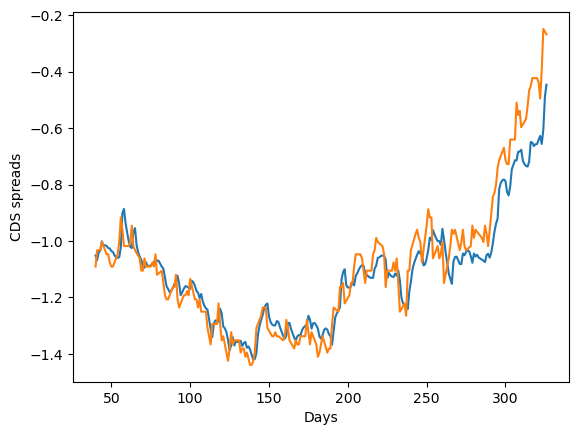

In [56]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('GRU resuts.png')

## 1D Convolutional neural network model

In [57]:
n_features = 7

# define model
model_conv1d = Sequential()
model_conv1d.add(InputLayer((n_steps, n_features)))
model_conv1d.add(Conv1D(64,kernel_size=2))
model_conv1d.add(Flatten())
model_conv1d.add(Dense(n_steps,'relu'))
model_conv1d.add(Dense(1,'linear'))

model_conv1d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 15, 64)            960       
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                15376     
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,353
Trainable params: 16,353
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_conv1d.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.conv1d"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks_list = [checkpoint]



# fit model
model_conv1d.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, callbacks=callbacks_list, shuffle=False)

Epoch 1/500
58/82 [====================>.........] - ETA: 0s - loss: 0.2455 - root_mean_squared_error: 0.4954 
Epoch 1: val_loss improved from inf to 0.09626, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.2412 - root_mean_squared_error: 0.4911 - val_loss: 0.0963 - val_root_mean_squared_error: 0.3103
Epoch 2/500
54/82 [==================>...........] - ETA: 0s - loss: 0.0971 - root_mean_squared_error: 0.3116
Epoch 2: val_loss improved from 0.09626 to 0.08662, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.1284 - root_mean_squared_error: 0.3584 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2943
Epoch 3/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0754 - root_mean_squared_error: 0.2747
Epoch 3: val_loss improved from 0.08662 to 0.06401, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.1110 - root_mean_squared_error: 0.3332 - val_loss: 0.0640 - val_root_mean_squared_error: 0.2530
Epoch 4/500
56/82 [===================>..........] - ETA: 0s - loss: 0.0384 - root_mean_squared_error: 0.1958
Epoch 4: val_loss did not improve from 0.06401
82/82 [==============================] - 0s 1ms/step - loss: 0.0701 - root_mean_squared_error: 0.2648 - val_loss: 0.1641 - val_root_mean_squared_error: 0.4051
Epoch 5/500
57/82 [===================>..........] - ETA: 0s - loss: 0.0315 - root_mean_squared_error: 0.1774
Epoch 5: val_loss improved from 0.06401 to 0.04211, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030 - val_loss: 0.0421 - val_root_mean_squared_error: 0.2052
Epoch 6/500
56/82 [===================>..........] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1549
Epoch 6: val_loss did not improve from 0.04211
82/82 [==============================] - 0s 1ms/step - loss: 0.0303 - root_mean_squared_error: 0.1739 - val_loss: 0.0873 - val_root_mean_squared_error: 0.2954
Epoch 7/500
55/82 [===================>..........] - ETA: 0s - loss: 0.0207 - root_mean_squared_error: 0.1437
Epoch 7: val_loss did not improve from 0.04211
82/82 [==============================] - 0s 1ms/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0450 - val_root_mean_squared_error: 0.2120
Epoch 8/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1366
Epoch 8: val_loss did not improve from 0.04211
82/82 [==============================] - 0s 1ms/step

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0186 - root_mean_squared_error: 0.1366 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1815
Epoch 18/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.1238
Epoch 18: val_loss did not improve from 0.03294
82/82 [==============================] - 0s 1ms/step - loss: 0.0188 - root_mean_squared_error: 0.1373 - val_loss: 0.0704 - val_root_mean_squared_error: 0.2653
Epoch 19/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1280
Epoch 19: val_loss did not improve from 0.03294
82/82 [==============================] - 0s 1ms/step - loss: 0.0206 - root_mean_squared_error: 0.1434 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2063
Epoch 20/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.1205
Epoch 20: val_loss improved from 0.03294 to 0.02441, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0206 - root_mean_squared_error: 0.1435 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 21/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1366
Epoch 21: val_loss did not improve from 0.02441
82/82 [==============================] - 0s 1ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - val_loss: 0.1131 - val_root_mean_squared_error: 0.3363
Epoch 22/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0232 - root_mean_squared_error: 0.1524
Epoch 22: val_loss did not improve from 0.02441
82/82 [==============================] - 0s 1ms/step - loss: 0.0253 - root_mean_squared_error: 0.1591 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1839
Epoch 23/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1111
Epoch 23: val_loss improved from 0.02441 to 0.01997, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0187 - root_mean_squared_error: 0.1367 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413
Epoch 24/500
51/82 [=================>............] - ETA: 0s - loss: 0.0194 - root_mean_squared_error: 0.1393
Epoch 24: val_loss did not improve from 0.01997
82/82 [==============================] - 0s 1ms/step - loss: 0.0261 - root_mean_squared_error: 0.1616 - val_loss: 0.1683 - val_root_mean_squared_error: 0.4103
Epoch 25/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0329 - root_mean_squared_error: 0.1813
Epoch 25: val_loss did not improve from 0.01997
82/82 [==============================] - 0s 1ms/step - loss: 0.0373 - root_mean_squared_error: 0.1932 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1743
Epoch 26/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1094
Epoch 26: val_loss did not improve from 0.01997
82/82 [==============================] - 0s 1m

59/82 [====================>.........] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.0957
Epoch 49: val_loss did not improve from 0.01997
82/82 [==============================] - 0s 1ms/step - loss: 0.0110 - root_mean_squared_error: 0.1049 - val_loss: 0.2210 - val_root_mean_squared_error: 0.4701
Epoch 50/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.0835
Epoch 50: val_loss did not improve from 0.01997
82/82 [==============================] - 0s 1ms/step - loss: 0.0136 - root_mean_squared_error: 0.1165 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2678
Epoch 51/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0980
Epoch 51: val_loss did not improve from 0.01997
82/82 [==============================] - 0s 1ms/step - loss: 0.0277 - root_mean_squared_error: 0.1664 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3101
Epoch 52/500
62/82 [=====================>........] - ETA: 

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0377 - root_mean_squared_error: 0.1941 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1277
Epoch 54/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1149
Epoch 54: val_loss did not improve from 0.01631
82/82 [==============================] - 0s 1ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - val_loss: 0.2750 - val_root_mean_squared_error: 0.5245
Epoch 55/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1133
Epoch 55: val_loss did not improve from 0.01631
82/82 [==============================] - 0s 1ms/step - loss: 0.0135 - root_mean_squared_error: 0.1162 - val_loss: 0.0514 - val_root_mean_squared_error: 0.2266
Epoch 56/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.0964
Epoch 56: val_loss did not improve from 0.01631
82/82 [==============================] - 0s 1m

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 70/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.0926
Epoch 70: val_loss did not improve from 0.01038
82/82 [==============================] - 0s 1ms/step - loss: 0.0090 - root_mean_squared_error: 0.0951 - val_loss: 0.2901 - val_root_mean_squared_error: 0.5386
Epoch 71/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.0918
Epoch 71: val_loss did not improve from 0.01038
82/82 [==============================] - 0s 1ms/step - loss: 0.0116 - root_mean_squared_error: 0.1079 - val_loss: 0.1405 - val_root_mean_squared_error: 0.3749
Epoch 72/500
65/82 [======================>.......] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.1025
Epoch 72: val_loss did not improve from 0.01038
82/82 [==============================] - 0s 1m

59/82 [====================>.........] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0823
Epoch 95: val_loss did not improve from 0.01038
82/82 [==============================] - 0s 1ms/step - loss: 0.0137 - root_mean_squared_error: 0.1168 - val_loss: 0.2323 - val_root_mean_squared_error: 0.4820
Epoch 96/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0076 - root_mean_squared_error: 0.0873
Epoch 96: val_loss did not improve from 0.01038
82/82 [==============================] - 0s 1ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1733
Epoch 97/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0771
Epoch 97: val_loss did not improve from 0.01038
82/82 [==============================] - 0s 1ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 0.1300 - val_root_mean_squared_error: 0.3606
Epoch 98/500
61/82 [=====================>........] - ETA: 

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0107 - root_mean_squared_error: 0.1032 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0959
Epoch 117/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0904
Epoch 117: val_loss did not improve from 0.00920
82/82 [==============================] - 0s 1ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.1123 - val_root_mean_squared_error: 0.3352
Epoch 118/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0783
Epoch 118: val_loss did not improve from 0.00920
82/82 [==============================] - 0s 1ms/step - loss: 0.0076 - root_mean_squared_error: 0.0874 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2551
Epoch 119/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0812
Epoch 119: val_loss did not improve from 0.00920
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0886
Epoch 137/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1076
Epoch 137: val_loss did not improve from 0.00784
82/82 [==============================] - 0s 1ms/step - loss: 0.0200 - root_mean_squared_error: 0.1414 - val_loss: 0.2673 - val_root_mean_squared_error: 0.5171
Epoch 138/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.0946
Epoch 138: val_loss did not improve from 0.00784
82/82 [==============================] - 0s 1ms/step - loss: 0.0132 - root_mean_squared_error: 0.1148 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1398
Epoch 139/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1155
Epoch 139: val_loss did not improve from 0.00784
82/82 [==============================] -

60/82 [====================>.........] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.0991
Epoch 162: val_loss did not improve from 0.00784
82/82 [==============================] - 0s 1ms/step - loss: 0.0093 - root_mean_squared_error: 0.0963 - val_loss: 0.0475 - val_root_mean_squared_error: 0.2180
Epoch 163/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.0895
Epoch 163: val_loss did not improve from 0.00784
82/82 [==============================] - 0s 1ms/step - loss: 0.0074 - root_mean_squared_error: 0.0858 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1908
Epoch 164/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0751
Epoch 164: val_loss did not improve from 0.00784
82/82 [==============================] - 0s 1ms/step - loss: 0.0054 - root_mean_squared_error: 0.0738 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2758
Epoch 165/500
63/82 [======================>.......] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0778
Epoch 179/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.0923
Epoch 179: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0165 - root_mean_squared_error: 0.1284 - val_loss: 0.1198 - val_root_mean_squared_error: 0.3462
Epoch 180/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.1027
Epoch 180: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0170 - root_mean_squared_error: 0.1303 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1496
Epoch 181/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1188
Epoch 181: val_loss did not improve from 0.00605
82/82 [==============================] -

63/82 [======================>.......] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.0940
Epoch 204: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0109 - root_mean_squared_error: 0.1045 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2177
Epoch 205/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0998
Epoch 205: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0976
Epoch 206/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0138 - root_mean_squared_error: 0.1177
Epoch 206: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1450
Epoch 207/500
64/82 [======================>.......] -

Epoch 230/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0567
Epoch 230: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 231/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0619
Epoch 231: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0047 - root_mean_squared_error: 0.0688 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0846
Epoch 232/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0671
Epoch 232: val_loss did not improve from 0.00605
82/82 [==============================] - 0s 1ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890
Epoch 233/500
62/82 [===================

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0039 - root_mean_squared_error: 0.0625 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0747
Epoch 253/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 253: val_loss did not improve from 0.00558
82/82 [==============================] - 0s 1ms/step - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0948
Epoch 254/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0558
Epoch 254: val_loss did not improve from 0.00558
82/82 [==============================] - 0s 1ms/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002
Epoch 255/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0596
Epoch 255: val_loss did not improve from 0.00558
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0043 - root_mean_squared_error: 0.0657 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 272/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0665
Epoch 272: val_loss did not improve from 0.00512
82/82 [==============================] - 0s 1ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 273/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0658
Epoch 273: val_loss did not improve from 0.00512
82/82 [==============================] - 0s 1ms/step - loss: 0.0043 - root_mean_squared_error: 0.0655 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0767
Epoch 274/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0624
Epoch 274: val_loss did not improve from 0.00512
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0055 - root_mean_squared_error: 0.0744 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0713
Epoch 278/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0683
Epoch 278: val_loss improved from 0.00508 to 0.00503, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0046 - root_mean_squared_error: 0.0676 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 279/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0662
Epoch 279: val_loss did not improve from 0.00503
82/82 [==============================] - 0s 1ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1034
Epoch 280/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0594
Epoch 280: val_loss did not improve from 0.00503
82/82 [==============================] - 0s 1ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0916
Epoch 281/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0605
Epoch 281: val_loss did not improve from 0.00503
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0695
Epoch 284/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0654
Epoch 284: val_loss did not improve from 0.00482
82/82 [==============================] - 0s 1ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0054 - val_root_mean_squared_error: 0.0733
Epoch 285/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0620
Epoch 285: val_loss did not improve from 0.00482
82/82 [==============================] - 0s 1ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1098
Epoch 286/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0560
Epoch 286: val_loss did not improve from 0.00482
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 294/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0584
Epoch 294: val_loss did not improve from 0.00467
82/82 [==============================] - 0s 1ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0729
Epoch 295/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0578
Epoch 295: val_loss did not improve from 0.00467
82/82 [==============================] - 0s 1ms/step - loss: 0.0036 - root_mean_squared_error: 0.0604 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 296/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 296: val_loss did not improve from 0.00467
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0046 - root_mean_squared_error: 0.0680 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0680
Epoch 300/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0610
Epoch 300: val_loss did not improve from 0.00462
82/82 [==============================] - 0s 1ms/step - loss: 0.0038 - root_mean_squared_error: 0.0620 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0725
Epoch 301/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0572
Epoch 301: val_loss did not improve from 0.00462
82/82 [==============================] - 0s 1ms/step - loss: 0.0036 - root_mean_squared_error: 0.0603 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912
Epoch 302/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 302: val_loss did not improve from 0.00462
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0657
Epoch 304/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 304: val_loss did not improve from 0.00432
82/82 [==============================] - 0s 1ms/step - loss: 0.0028 - root_mean_squared_error: 0.0533 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 305/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 305: val_loss did not improve from 0.00432
82/82 [==============================] - 0s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0828
Epoch 306/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 306: val_loss did not improve from 0.00432
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0648
Epoch 308/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0541
Epoch 308: val_loss did not improve from 0.00420
82/82 [==============================] - 0s 1ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 309/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0503
Epoch 309: val_loss did not improve from 0.00420
82/82 [==============================] - 0s 1ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 310/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0510
Epoch 310: val_loss did not improve from 0.00420
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0028 - root_mean_squared_error: 0.0534 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 320/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0522
Epoch 320: val_loss did not improve from 0.00418
82/82 [==============================] - 0s 1ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 321/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0496
Epoch 321: val_loss did not improve from 0.00418
82/82 [==============================] - 0s 1ms/step - loss: 0.0026 - root_mean_squared_error: 0.0510 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0659
Epoch 322/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0483
Epoch 322: val_loss did not improve from 0.00418
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0636
Epoch 339/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0440
Epoch 339: val_loss did not improve from 0.00404
82/82 [==============================] - 0s 1ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0663
Epoch 340/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0441
Epoch 340: val_loss improved from 0.00404 to 0.00387, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0622
Epoch 341/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0445
Epoch 341: val_loss did not improve from 0.00387
82/82 [==============================] - 0s 1ms/step - loss: 0.0021 - root_mean_squared_error: 0.0453 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 342/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0446
Epoch 342: val_loss improved from 0.00387 to 0.00374, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0021 - root_mean_squared_error: 0.0461 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612
Epoch 343/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0460
Epoch 343: val_loss did not improve from 0.00374
82/82 [==============================] - 0s 1ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 344/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0473
Epoch 344: val_loss improved from 0.00374 to 0.00361, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0024 - root_mean_squared_error: 0.0490 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0601
Epoch 345/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0484
Epoch 345: val_loss did not improve from 0.00361
82/82 [==============================] - 0s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0689
Epoch 346/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 346: val_loss did not improve from 0.00361
82/82 [==============================] - 0s 1ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0616
Epoch 347/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0526
Epoch 347: val_loss did not improve from 0.00361
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 365/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472
Epoch 365: val_loss did not improve from 0.00345
82/82 [==============================] - 0s 1ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 366/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0457
Epoch 366: val_loss did not improve from 0.00345
82/82 [==============================] - 0s 1ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 367/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0495
Epoch 367: val_loss did not improve from 0.00345
82/82 [==============================] -

63/82 [======================>.......] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 390: val_loss did not improve from 0.00345
82/82 [==============================] - 0s 1ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0595
Epoch 391/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 391: val_loss did not improve from 0.00345
82/82 [==============================] - 0s 1ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 392/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0474
Epoch 392: val_loss improved from 0.00345 to 0.00344, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 393/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0486
Epoch 393: val_loss did not improve from 0.00344
82/82 [==============================] - 0s 1ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618
Epoch 394/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0487
Epoch 394: val_loss did not improve from 0.00344
82/82 [==============================] - 0s 1ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600
Epoch 395/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0467
Epoch 395: val_loss did not improve from 0.00344
82/82 [==============================] -

64/82 [======================>.......] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0505
Epoch 418: val_loss did not improve from 0.00344
82/82 [==============================] - 0s 1ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 419/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0522
Epoch 419: val_loss did not improve from 0.00344
82/82 [==============================] - 0s 1ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0700
Epoch 420/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0550
Epoch 420: val_loss did not improve from 0.00344
82/82 [==============================] - 0s 1ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0672
Epoch 421/500
62/82 [=====================>........] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 438/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0477
Epoch 438: val_loss did not improve from 0.00344
82/82 [==============================] - 0s 1ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0696
Epoch 439/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0454
Epoch 439: val_loss did not improve from 0.00344
82/82 [==============================] - 0s 1ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0629
Epoch 440/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 440: val_loss did not improve from 0.00344
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586
Epoch 444/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0509    
Epoch 444: val_loss did not improve from 0.00343
82/82 [==============================] - 0s 1ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 445/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0528
Epoch 445: val_loss did not improve from 0.00343
82/82 [==============================] - 0s 1ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 446/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0509
Epoch 446: val_loss did not improve from 0.00343
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0026 - root_mean_squared_error: 0.0508 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 448/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 448: val_loss did not improve from 0.00309
82/82 [==============================] - 0s 1ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 449/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 449: val_loss did not improve from 0.00309
82/82 [==============================] - 0s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0613
Epoch 450/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0509
Epoch 450: val_loss did not improve from 0.00309
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 453/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0463
Epoch 453: val_loss did not improve from 0.00304
82/82 [==============================] - 0s 1ms/step - loss: 0.0024 - root_mean_squared_error: 0.0487 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 454/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0477
Epoch 454: val_loss did not improve from 0.00304
82/82 [==============================] - 0s 1ms/step - loss: 0.0024 - root_mean_squared_error: 0.0492 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 455/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 455: val_loss did not improve from 0.00304
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0526
Epoch 458/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0481
Epoch 458: val_loss did not improve from 0.00277
82/82 [==============================] - 0s 1ms/step - loss: 0.0025 - root_mean_squared_error: 0.0500 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0566
Epoch 459/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0455
Epoch 459: val_loss did not improve from 0.00277
82/82 [==============================] - 0s 1ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 460/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0447
Epoch 460: val_loss did not improve from 0.00277
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 475/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0411
Epoch 475: val_loss did not improve from 0.00252
82/82 [==============================] - 0s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553
Epoch 476/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0409
Epoch 476: val_loss did not improve from 0.00252
82/82 [==============================] - 0s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0510
Epoch 477/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0429
Epoch 477: val_loss did not improve from 0.00252
82/82 [==============================] -

63/82 [======================>.......] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0438
Epoch 500: val_loss did not improve from 0.00252
82/82 [==============================] - 0s 1ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0570


In [59]:
y_hat_conv1d = model_conv1d.predict(x_val, verbose=0)

In [60]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_conv1d.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.902345 -0.858389
1            -0.896170 -0.814813
2            -0.831953 -0.843864
3            -0.835510 -0.863231
4            -0.903272 -0.882599
..                 ...       ...
322          -0.486920 -0.495251
323          -0.620072 -0.393573
324          -0.414953 -0.248317
325          -0.462284 -0.258001
326          -0.182696 -0.267685

[327 rows x 2 columns]


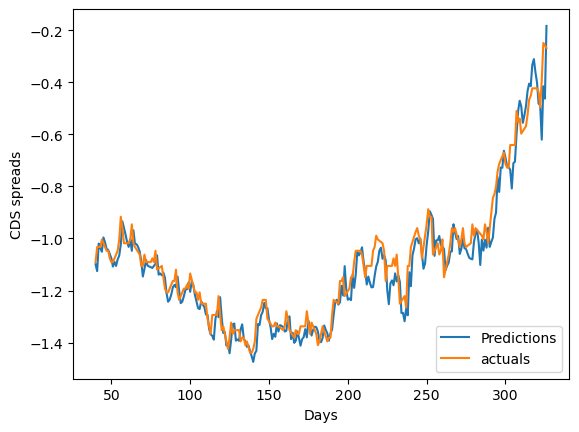

In [61]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('Conv1D results.png')

### LSTM model

In [62]:
n_features = 7

# define model
model_lstm = Sequential()
model_lstm.add(InputLayer((n_steps, n_features)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(n_steps,'relu'))
model_lstm.add(Dense(1,'linear'))

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18432     
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19,489
Trainable params: 19,489
Non-trainable params: 0
_________________________________________________________________


In [63]:
# cp = ModelCheckpoint('/model_lstm/', save_best_only = True)

model_lstm.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.lstm"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks_list = [checkpoint]



# fit model
model_lstm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, callbacks=callbacks_list,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - ETA: 0s - loss: 0.7006 - root_mean_squared_error: 0.8370
Epoch 1: val_loss improved from inf to 1.35420, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 7s 66ms/step - loss: 0.7006 - root_mean_squared_error: 0.8370 - val_loss: 1.3542 - val_root_mean_squared_error: 1.1637
Epoch 2/500
72/82 [=========================>....] - ETA: 0s - loss: 0.2626 - root_mean_squared_error: 0.5125
Epoch 2: val_loss improved from 1.35420 to 0.83085, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.4822 - root_mean_squared_error: 0.6944 - val_loss: 0.8309 - val_root_mean_squared_error: 0.9115
Epoch 3/500
71/82 [========================>.....] - ETA: 0s - loss: 0.1722 - root_mean_squared_error: 0.4150
Epoch 3: val_loss improved from 0.83085 to 0.43225, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.3397 - root_mean_squared_error: 0.5828 - val_loss: 0.4322 - val_root_mean_squared_error: 0.6575
Epoch 4/500
72/82 [=========================>....] - ETA: 0s - loss: 0.1215 - root_mean_squared_error: 0.3485
Epoch 4: val_loss improved from 0.43225 to 0.16977, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.1968 - root_mean_squared_error: 0.4437 - val_loss: 0.1698 - val_root_mean_squared_error: 0.4120
Epoch 5/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0770 - root_mean_squared_error: 0.2775
Epoch 5: val_loss improved from 0.16977 to 0.04698, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.1005 - root_mean_squared_error: 0.3169 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2167
Epoch 6/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0511 - root_mean_squared_error: 0.2261
Epoch 6: val_loss improved from 0.04698 to 0.03445, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0521 - root_mean_squared_error: 0.2283 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1856
Epoch 7/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0373 - root_mean_squared_error: 0.1931
Epoch 7: val_loss did not improve from 0.03445
82/82 [==============================] - 0s 5ms/step - loss: 0.0347 - root_mean_squared_error: 0.1863 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2214
Epoch 8/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0289 - root_mean_squared_error: 0.1700
Epoch 8: val_loss did not improve from 0.03445
82/82 [==============================] - 0s 5ms/step - loss: 0.0271 - root_mean_squared_error: 0.1648 - val_loss: 0.0482 - val_root_mean_squared_error: 0.2196
Epoch 9/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1545
Epoch 9: val_loss did not improve from 0.03445
82/82 [==============================] - 0s 5ms/ste

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1789
Epoch 13/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1240
Epoch 13: val_loss improved from 0.03202 to 0.03011, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0149 - root_mean_squared_error: 0.1219 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1735
Epoch 14/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.1200
Epoch 14: val_loss improved from 0.03011 to 0.02886, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0140 - root_mean_squared_error: 0.1181 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1699
Epoch 15/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1167
Epoch 15: val_loss improved from 0.02886 to 0.02810, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676
Epoch 16/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1139
Epoch 16: val_loss improved from 0.02810 to 0.02772, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 17/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1115
Epoch 17: val_loss improved from 0.02772 to 0.02757, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1660
Epoch 18/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.1084
Epoch 18: val_loss did not improve from 0.02757
82/82 [==============================] - 0s 5ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1661
Epoch 19/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 19: val_loss did not improve from 0.02757
82/82 [==============================] - 0s 5ms/step - loss: 0.0112 - root_mean_squared_error: 0.1059 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 20/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.1058
Epoch 20: val_loss did not improve from 0.02757
82/82 [==============================] - 0s 5

73/82 [=========================>....] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0826
Epoch 43: val_loss did not improve from 0.02757
82/82 [==============================] - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0817 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1687
Epoch 44/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0818
Epoch 44: val_loss did not improve from 0.02757
82/82 [==============================] - 0s 5ms/step - loss: 0.0065 - root_mean_squared_error: 0.0809 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1683
Epoch 45/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0810
Epoch 45: val_loss did not improve from 0.02757
82/82 [==============================] - 0s 5ms/step - loss: 0.0064 - root_mean_squared_error: 0.0802 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 46/500
73/82 [=========================>....] - ETA: 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0059 - root_mean_squared_error: 0.0767 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1653
Epoch 51/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0766
Epoch 51: val_loss did not improve from 0.02733
82/82 [==============================] - 0s 5ms/step - loss: 0.0058 - root_mean_squared_error: 0.0760 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1662
Epoch 52/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0759
Epoch 52: val_loss improved from 0.02733 to 0.02692, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1641
Epoch 53/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0753
Epoch 53: val_loss did not improve from 0.02692
82/82 [==============================] - 0s 5ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1661
Epoch 54/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0745
Epoch 54: val_loss improved from 0.02692 to 0.02624, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1620
Epoch 55/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0739
Epoch 55: val_loss did not improve from 0.02624
82/82 [==============================] - 0s 5ms/step - loss: 0.0054 - root_mean_squared_error: 0.0735 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 56/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0731
Epoch 56: val_loss improved from 0.02624 to 0.02592, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1610
Epoch 57/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0724
Epoch 57: val_loss did not improve from 0.02592
82/82 [==============================] - 0s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0721 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1647
Epoch 58/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0718
Epoch 58: val_loss did not improve from 0.02592
82/82 [==============================] - 0s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1617
Epoch 59/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0711
Epoch 59: val_loss did not improve from 0.02592
82/82 [==============================] - 0s 5

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1565
Epoch 62/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0713
Epoch 62: val_loss did not improve from 0.02448
82/82 [==============================] - 0s 5ms/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1671
Epoch 63/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0704
Epoch 63: val_loss improved from 0.02448 to 0.02356, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1535
Epoch 64/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0702
Epoch 64: val_loss did not improve from 0.02356
82/82 [==============================] - 0s 5ms/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1658
Epoch 65/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0686
Epoch 65: val_loss did not improve from 0.02356
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0687 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1540
Epoch 66/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0676
Epoch 66: val_loss did not improve from 0.02356
82/82 [==============================] - 0s 5

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0044 - root_mean_squared_error: 0.0660 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507
Epoch 71/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0656
Epoch 71: val_loss did not improve from 0.02272
82/82 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1620
Epoch 72/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0654
Epoch 72: val_loss improved from 0.02272 to 0.02195, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1482
Epoch 73/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0652
Epoch 73: val_loss did not improve from 0.02195
82/82 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1626
Epoch 74/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0649
Epoch 74: val_loss improved from 0.02195 to 0.02131, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1460
Epoch 75/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0647
Epoch 75: val_loss did not improve from 0.02131
82/82 [==============================] - 0s 5ms/step - loss: 0.0042 - root_mean_squared_error: 0.0647 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1603
Epoch 76/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 76: val_loss did not improve from 0.02131
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1522
Epoch 77/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0637
Epoch 77: val_loss did not improve from 0.02131
82/82 [==============================] - 0s 5

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0046 - root_mean_squared_error: 0.0676 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1388
Epoch 80/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0724
Epoch 80: val_loss did not improve from 0.01928
82/82 [==============================] - 0s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1698
Epoch 81/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0696
Epoch 81: val_loss improved from 0.01928 to 0.01859, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0048 - root_mean_squared_error: 0.0689 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1363
Epoch 82/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0791
Epoch 82: val_loss did not improve from 0.01859
82/82 [==============================] - 0s 5ms/step - loss: 0.0061 - root_mean_squared_error: 0.0782 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1722
Epoch 83/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0694
Epoch 83: val_loss improved from 0.01859 to 0.01761, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0048 - root_mean_squared_error: 0.0691 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1327
Epoch 84/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0751
Epoch 84: val_loss did not improve from 0.01761
82/82 [==============================] - 0s 5ms/step - loss: 0.0055 - root_mean_squared_error: 0.0738 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1557
Epoch 85/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0681
Epoch 85: val_loss did not improve from 0.01761
82/82 [==============================] - 0s 5ms/step - loss: 0.0046 - root_mean_squared_error: 0.0677 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1399
Epoch 86/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0646
Epoch 86: val_loss did not improve from 0.01761
82/82 [==============================] - 0s 5

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 95/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0738
Epoch 95: val_loss did not improve from 0.01698
82/82 [==============================] - 0s 5ms/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1437
Epoch 96/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0711
Epoch 96: val_loss did not improve from 0.01698
82/82 [==============================] - 0s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1617
Epoch 97/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.0895
Epoch 97: val_loss improved from 0.01698 to 0.01549, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0078 - root_mean_squared_error: 0.0881 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 98/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0643
Epoch 98: val_loss improved from 0.01549 to 0.01419, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0047 - root_mean_squared_error: 0.0682 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 99/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0091 - root_mean_squared_error: 0.0951
Epoch 99: val_loss did not improve from 0.01419
82/82 [==============================] - 0s 5ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1603
Epoch 100/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.0850
Epoch 100: val_loss did not improve from 0.01419
82/82 [==============================] - 0s 5ms/step - loss: 0.0071 - root_mean_squared_error: 0.0841 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1437
Epoch 101/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.0988
Epoch 101: val_loss improved from 0.01419 to 0.01163, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0094 - root_mean_squared_error: 0.0968 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 102/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0805
Epoch 102: val_loss did not improve from 0.01163
82/82 [==============================] - 0s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0786 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1509
Epoch 103/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.0855
Epoch 103: val_loss did not improve from 0.01163
82/82 [==============================] - 0s 5ms/step - loss: 0.0070 - root_mean_squared_error: 0.0838 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1483
Epoch 104/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0789
Epoch 104: val_loss did not improve from 0.01163
82/82 [==============================] 

75/82 [==========================>...] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0653
Epoch 127: val_loss did not improve from 0.01163
82/82 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1468
Epoch 128/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0816
Epoch 128: val_loss did not improve from 0.01163
82/82 [==============================] - 0s 5ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1258
Epoch 129/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0666
Epoch 129: val_loss did not improve from 0.01163
82/82 [==============================] - 0s 5ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1283
Epoch 130/500
73/82 [=========================>....] -

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1014
Epoch 133/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0761
Epoch 133: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0056 - root_mean_squared_error: 0.0746 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1536
Epoch 134/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0778
Epoch 134: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305
Epoch 135/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0707
Epoch 135: val_loss did not improve from 0.01028
82/82 [==============================] 

73/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0656
Epoch 158: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1263
Epoch 159/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0662
Epoch 159: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1241
Epoch 160/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0674
Epoch 160: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0044 - root_mean_squared_error: 0.0666 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1365
Epoch 161/500
73/82 [=========================>....] -

Epoch 184/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0554
Epoch 184: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1448
Epoch 185/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0612
Epoch 185: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0614 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 186/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0524
Epoch 186: val_loss did not improve from 0.01028
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0542 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1152
Epoch 187/500
73/82 [===================

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003
Epoch 193/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 193: val_loss did not improve from 0.01006
82/82 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0612 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1419
Epoch 194/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 194: val_loss did not improve from 0.01006
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 195/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0563
Epoch 195: val_loss did not improve from 0.01006
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 212/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0529
Epoch 212: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1252
Epoch 213/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0575
Epoch 213: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1393
Epoch 214/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0653
Epoch 214: val_loss did not improve from 0.00981
82/82 [==============================] 

72/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 237: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 238/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0582
Epoch 238: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1301
Epoch 239/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0661
Epoch 239: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1340
Epoch 240/500
73/82 [=========================>....] -

Epoch 263/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0612
Epoch 263: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1254
Epoch 264/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0547
Epoch 264: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 265/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0534
Epoch 265: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1479
Epoch 266/500
73/82 [===================

Epoch 289/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0500
Epoch 289: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1046
Epoch 290/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0526
Epoch 290: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1437
Epoch 291/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0545
Epoch 291: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1344
Epoch 292/500
74/82 [===================

Epoch 315/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0493
Epoch 315: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1375
Epoch 316/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 316: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0525 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1272
Epoch 317/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0523
Epoch 317: val_loss did not improve from 0.00981
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1181
Epoch 318/500
73/82 [===================

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0901
Epoch 328/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0553
Epoch 328: val_loss did not improve from 0.00812
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0546 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1293
Epoch 329/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0531
Epoch 329: val_loss did not improve from 0.00812
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1306
Epoch 330/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0610
Epoch 330: val_loss did not improve from 0.00812
82/82 [==============================] 

73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 353: val_loss did not improve from 0.00812
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 354/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 354: val_loss did not improve from 0.00812
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1379
Epoch 355/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 355: val_loss did not improve from 0.00812
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0544 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1214
Epoch 356/500
73/82 [=========================>....] -

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0045 - root_mean_squared_error: 0.0674 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 357/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0646
Epoch 357: val_loss did not improve from 0.00581
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0644 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1259
Epoch 358/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0567
Epoch 358: val_loss did not improve from 0.00581
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1041
Epoch 359/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0602
Epoch 359: val_loss did not improve from 0.00581
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0662
Epoch 368/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0070 - root_mean_squared_error: 0.0839
Epoch 368: val_loss did not improve from 0.00438
82/82 [==============================] - 0s 5ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 369/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0689
Epoch 369: val_loss improved from 0.00438 to 0.00423, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0056 - root_mean_squared_error: 0.0750 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 370/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0602
Epoch 370: val_loss did not improve from 0.00423
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0689 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1270
Epoch 371/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0571
Epoch 371: val_loss improved from 0.00423 to 0.00412, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 372/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0521
Epoch 372: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 373/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0503
Epoch 373: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 374/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 374: val_loss did not improve from 0.00412
82/82 [==============================] 

73/82 [=========================>....] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0625
Epoch 397: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 398/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0600
Epoch 398: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1207
Epoch 399/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0591
Epoch 399: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0756
Epoch 400/500
73/82 [=========================>....] -

Epoch 423/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0573
Epoch 423: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 424/500
82/82 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0579
Epoch 424: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0579 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1144
Epoch 425/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0564
Epoch 425: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 426/500
73/82 [===================

Epoch 449/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0551
Epoch 449: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0915
Epoch 450/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0550
Epoch 450: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 451/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0548
Epoch 451: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 452/500
72/82 [===================

Epoch 475/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 475: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969
Epoch 476/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0537
Epoch 476: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1075
Epoch 477/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 477: val_loss did not improve from 0.00412
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0534 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0972
Epoch 478/500
73/82 [===================

In [64]:
# from keras.models import load_model
# model_lstm = load_model('model_lstm/')

In [65]:
y_hat_lstm = model_lstm.predict(x_val, verbose=0)

In [66]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_lstm.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.892619 -0.858389
1            -0.866971 -0.814813
2            -0.861677 -0.843864
3            -0.826239 -0.863231
4            -0.821395 -0.882599
..                 ...       ...
322          -0.468309 -0.495251
323          -0.525809 -0.393573
324          -0.620155 -0.248317
325          -0.527349 -0.258001
326          -0.481686 -0.267685

[327 rows x 2 columns]


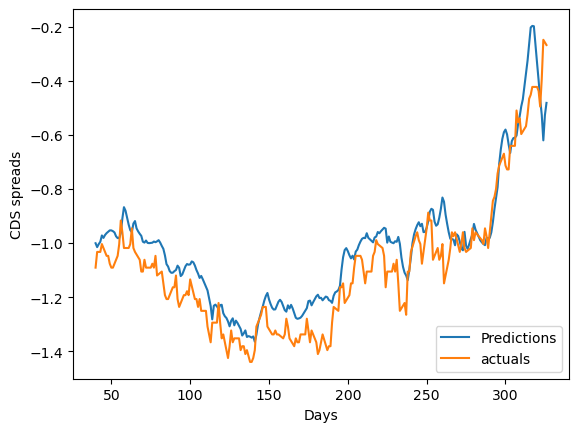

In [67]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('LSTM results.png')

## Feedforward NN model

In [68]:
n_features = 7

# define model
model_nn = Sequential()
model_nn.add(InputLayer((n_steps, n_features)))
model_nn.add(Dense(n_steps,'relu'))
model_nn.add(Dense(n_steps,'relu'))
model_nn.add(Flatten())
model_nn.add(Dense(1,'linear'))


model_nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16, 16)            128       
                                                                 
 dense_11 (Dense)            (None, 16, 16)            272       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [69]:

model_nn.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.nn"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks_list = [checkpoint]



# fit model
model_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, callbacks=callbacks_list, verbose=1, shuffle=False)

Epoch 1/500
77/82 [===========================>..] - ETA: 0s - loss: 0.6563 - root_mean_squared_error: 0.8101 
Epoch 1: val_loss improved from inf to 0.74345, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.7510 - root_mean_squared_error: 0.8666 - val_loss: 0.7435 - val_root_mean_squared_error: 0.8622
Epoch 2/500
77/82 [===========================>..] - ETA: 0s - loss: 0.5753 - root_mean_squared_error: 0.7585
Epoch 2: val_loss improved from 0.74345 to 0.62830, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 12ms/step - loss: 0.6597 - root_mean_squared_error: 0.8122 - val_loss: 0.6283 - val_root_mean_squared_error: 0.7927
Epoch 3/500
81/82 [============================>.] - ETA: 0s - loss: 0.5959 - root_mean_squared_error: 0.7719
Epoch 3: val_loss improved from 0.62830 to 0.52827, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.5972 - root_mean_squared_error: 0.7728 - val_loss: 0.5283 - val_root_mean_squared_error: 0.7268
Epoch 4/500
82/82 [==============================] - ETA: 0s - loss: 0.5430 - root_mean_squared_error: 0.7369
Epoch 4: val_loss improved from 0.52827 to 0.43727, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.5430 - root_mean_squared_error: 0.7369 - val_loss: 0.4373 - val_root_mean_squared_error: 0.6613
Epoch 5/500
81/82 [============================>.] - ETA: 0s - loss: 0.4933 - root_mean_squared_error: 0.7023
Epoch 5: val_loss improved from 0.43727 to 0.35228, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.4935 - root_mean_squared_error: 0.7025 - val_loss: 0.3523 - val_root_mean_squared_error: 0.5935
Epoch 6/500
78/82 [===========================>..] - ETA: 0s - loss: 0.4123 - root_mean_squared_error: 0.6421
Epoch 6: val_loss improved from 0.35228 to 0.27261, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.4474 - root_mean_squared_error: 0.6689 - val_loss: 0.2726 - val_root_mean_squared_error: 0.5221
Epoch 7/500
78/82 [===========================>..] - ETA: 0s - loss: 0.3741 - root_mean_squared_error: 0.6116
Epoch 7: val_loss improved from 0.27261 to 0.19928, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.4041 - root_mean_squared_error: 0.6357 - val_loss: 0.1993 - val_root_mean_squared_error: 0.4464
Epoch 8/500
82/82 [==============================] - ETA: 0s - loss: 0.3634 - root_mean_squared_error: 0.6028
Epoch 8: val_loss improved from 0.19928 to 0.13497, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.3634 - root_mean_squared_error: 0.6028 - val_loss: 0.1350 - val_root_mean_squared_error: 0.3674
Epoch 9/500
80/82 [============================>.] - ETA: 0s - loss: 0.3232 - root_mean_squared_error: 0.5685
Epoch 9: val_loss improved from 0.13497 to 0.08324, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.3255 - root_mean_squared_error: 0.5705 - val_loss: 0.0832 - val_root_mean_squared_error: 0.2885
Epoch 10/500
81/82 [============================>.] - ETA: 0s - loss: 0.2926 - root_mean_squared_error: 0.5409
Epoch 10: val_loss improved from 0.08324 to 0.04752, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.2908 - root_mean_squared_error: 0.5393 - val_loss: 0.0475 - val_root_mean_squared_error: 0.2180
Epoch 11/500
 1/82 [..............................] - ETA: 0s - loss: 0.0264 - root_mean_squared_error: 0.1624
Epoch 11: val_loss improved from 0.04752 to 0.03032, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.2594 - root_mean_squared_error: 0.5093 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1741
Epoch 12/500
82/82 [==============================] - ETA: 0s - loss: 0.2311 - root_mean_squared_error: 0.4807
Epoch 12: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 895us/step - loss: 0.2311 - root_mean_squared_error: 0.4807 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1812
Epoch 13/500
81/82 [============================>.] - ETA: 0s - loss: 0.2077 - root_mean_squared_error: 0.4557
Epoch 13: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 895us/step - loss: 0.2059 - root_mean_squared_error: 0.4537 - val_loss: 0.0543 - val_root_mean_squared_error: 0.2331
Epoch 14/500
79/82 [===========================>..] - ETA: 0s - loss: 0.1850 - root_mean_squared_error: 0.4301
Epoch 14: val_loss did not improve from 0.03032
82/82 [==============================] - 

 1/82 [..............................] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1132
Epoch 37: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 861us/step - loss: 0.0447 - root_mean_squared_error: 0.2115 - val_loss: 0.3678 - val_root_mean_squared_error: 0.6064
Epoch 38/500
 1/82 [..............................] - ETA: 0s - loss: 0.0130 - root_mean_squared_error: 0.1141
Epoch 38: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 856us/step - loss: 0.0434 - root_mean_squared_error: 0.2082 - val_loss: 0.3613 - val_root_mean_squared_error: 0.6011
Epoch 39/500
 1/82 [..............................] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1147
Epoch 39: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 847us/step - loss: 0.0421 - root_mean_squared_error: 0.2052 - val_loss: 0.3553 - val_root_mean_squared_error: 0.5961
Epoch 40/500
 1/82 [..............................] -

Epoch 63/500
 1/82 [..............................] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1152
Epoch 63: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 861us/step - loss: 0.0242 - root_mean_squared_error: 0.1556 - val_loss: 0.2856 - val_root_mean_squared_error: 0.5344
Epoch 64/500
 1/82 [..............................] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1148
Epoch 64: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 853us/step - loss: 0.0238 - root_mean_squared_error: 0.1542 - val_loss: 0.2834 - val_root_mean_squared_error: 0.5323
Epoch 65/500
 1/82 [..............................] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1143
Epoch 65: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 846us/step - loss: 0.0233 - root_mean_squared_error: 0.1528 - val_loss: 0.2811 - val_root_mean_squared_error: 0.5302
Epoch 66/500
 1/82 [....................

Epoch 89/500
 1/82 [..............................] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0981
Epoch 89: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 853us/step - loss: 0.0162 - root_mean_squared_error: 0.1271 - val_loss: 0.2328 - val_root_mean_squared_error: 0.4825
Epoch 90/500
 1/82 [..............................] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.0965
Epoch 90: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 854us/step - loss: 0.0160 - root_mean_squared_error: 0.1263 - val_loss: 0.2310 - val_root_mean_squared_error: 0.4806
Epoch 91/500
 1/82 [..............................] - ETA: 0s - loss: 0.0093 - root_mean_squared_error: 0.0964
Epoch 91: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 851us/step - loss: 0.0158 - root_mean_squared_error: 0.1255 - val_loss: 0.2293 - val_root_mean_squared_error: 0.4789
Epoch 92/500
 1/82 [....................

Epoch 115/500
 1/82 [..............................] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0781
Epoch 115: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 855us/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.1995 - val_root_mean_squared_error: 0.4467
Epoch 116/500
 1/82 [..............................] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0777
Epoch 116: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 849us/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - val_loss: 0.1981 - val_root_mean_squared_error: 0.4451
Epoch 117/500
 1/82 [..............................] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0782
Epoch 117: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 851us/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.1973 - val_root_mean_squared_error: 0.4442
Epoch 118/500
 1/82 [.............

82/82 [==============================] - 0s 862us/step - loss: 0.0098 - root_mean_squared_error: 0.0992 - val_loss: 0.1771 - val_root_mean_squared_error: 0.4209
Epoch 141/500
 1/82 [..............................] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0646
Epoch 141: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 858us/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.1764 - val_root_mean_squared_error: 0.4200
Epoch 142/500
 1/82 [..............................] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0640
Epoch 142: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 850us/step - loss: 0.0097 - root_mean_squared_error: 0.0985 - val_loss: 0.1756 - val_root_mean_squared_error: 0.4191
Epoch 143/500
 1/82 [..............................] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0641
Epoch 143: val_loss did not improve from 0.03032
82/82 [===========================

Epoch 166/500
82/82 [==============================] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0904
Epoch 166: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 887us/step - loss: 0.0082 - root_mean_squared_error: 0.0904 - val_loss: 0.1572 - val_root_mean_squared_error: 0.3964
Epoch 167/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0566
Epoch 167: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 842us/step - loss: 0.0081 - root_mean_squared_error: 0.0901 - val_loss: 0.1566 - val_root_mean_squared_error: 0.3957
Epoch 168/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 168: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 854us/step - loss: 0.0081 - root_mean_squared_error: 0.0898 - val_loss: 0.1559 - val_root_mean_squared_error: 0.3949
Epoch 169/500
 1/82 [.............

82/82 [==============================] - 0s 858us/step - loss: 0.0069 - root_mean_squared_error: 0.0828 - val_loss: 0.1438 - val_root_mean_squared_error: 0.3792
Epoch 192/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 192: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 853us/step - loss: 0.0068 - root_mean_squared_error: 0.0825 - val_loss: 0.1432 - val_root_mean_squared_error: 0.3784
Epoch 193/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 193: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 845us/step - loss: 0.0068 - root_mean_squared_error: 0.0822 - val_loss: 0.1425 - val_root_mean_squared_error: 0.3775
Epoch 194/500
 1/82 [..............................] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0560
Epoch 194: val_loss did not improve from 0.03032
82/82 [===========================

Epoch 217/500
82/82 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0760
Epoch 217: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 885us/step - loss: 0.0058 - root_mean_squared_error: 0.0760 - val_loss: 0.1311 - val_root_mean_squared_error: 0.3621
Epoch 218/500
 1/82 [..............................] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0578
Epoch 218: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 849us/step - loss: 0.0057 - root_mean_squared_error: 0.0758 - val_loss: 0.1306 - val_root_mean_squared_error: 0.3614
Epoch 219/500
 1/82 [..............................] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0587
Epoch 219: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 853us/step - loss: 0.0057 - root_mean_squared_error: 0.0755 - val_loss: 0.1303 - val_root_mean_squared_error: 0.3610
Epoch 220/500
 1/82 [.............

82/82 [==============================] - 0s 859us/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.1201 - val_root_mean_squared_error: 0.3466
Epoch 243/500
 1/82 [..............................] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0589
Epoch 243: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 857us/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.1199 - val_root_mean_squared_error: 0.3463
Epoch 244/500
 1/82 [..............................] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 244: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 853us/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 0.1195 - val_root_mean_squared_error: 0.3456
Epoch 245/500
 1/82 [..............................] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0606
Epoch 245: val_loss did not improve from 0.03032
82/82 [===========================

Epoch 268/500
 1/82 [..............................] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0651
Epoch 268: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 854us/step - loss: 0.0044 - root_mean_squared_error: 0.0663 - val_loss: 0.1109 - val_root_mean_squared_error: 0.3330
Epoch 269/500
 1/82 [..............................] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0621
Epoch 269: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 851us/step - loss: 0.0044 - root_mean_squared_error: 0.0661 - val_loss: 0.1101 - val_root_mean_squared_error: 0.3319
Epoch 270/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0566
Epoch 270: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 843us/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - val_loss: 0.1096 - val_root_mean_squared_error: 0.3310
Epoch 271/500
 1/82 [.............

82/82 [==============================] - 0s 863us/step - loss: 0.0041 - root_mean_squared_error: 0.0643 - val_loss: 0.1055 - val_root_mean_squared_error: 0.3249
Epoch 294/500
 1/82 [..............................] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0578
Epoch 294: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 852us/step - loss: 0.0040 - root_mean_squared_error: 0.0634 - val_loss: 0.1045 - val_root_mean_squared_error: 0.3233
Epoch 295/500
 1/82 [..............................] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0598
Epoch 295: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 847us/step - loss: 0.0041 - root_mean_squared_error: 0.0639 - val_loss: 0.1055 - val_root_mean_squared_error: 0.3248
Epoch 296/500
 1/82 [..............................] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0649
Epoch 296: val_loss did not improve from 0.03032
82/82 [===========================

Epoch 319/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0496
Epoch 319: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 855us/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3238
Epoch 320/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0496
Epoch 320: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 852us/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.1054 - val_root_mean_squared_error: 0.3246
Epoch 321/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0501
Epoch 321: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 849us/step - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.1054 - val_root_mean_squared_error: 0.3246
Epoch 322/500
 1/82 [.............

82/82 [==============================] - 0s 858us/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.1036 - val_root_mean_squared_error: 0.3218
Epoch 345/500
 1/82 [..............................] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 345: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 860us/step - loss: 0.0033 - root_mean_squared_error: 0.0579 - val_loss: 0.1035 - val_root_mean_squared_error: 0.3217
Epoch 346/500
 1/82 [..............................] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0515
Epoch 346: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 845us/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - val_loss: 0.1035 - val_root_mean_squared_error: 0.3217
Epoch 347/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0496
Epoch 347: val_loss did not improve from 0.03032
82/82 [===========================

Epoch 370/500
 1/82 [..............................] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0447
Epoch 370: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 858us/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.1022 - val_root_mean_squared_error: 0.3197
Epoch 371/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0490
Epoch 371: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 854us/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0986 - val_root_mean_squared_error: 0.3141
Epoch 372/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0454
Epoch 372: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 844us/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.1027 - val_root_mean_squared_error: 0.3205
Epoch 373/500
 1/82 [.............

82/82 [==============================] - 0s 842us/step - loss: 0.0030 - root_mean_squared_error: 0.0545 - val_loss: 0.0957 - val_root_mean_squared_error: 0.3094
Epoch 396/500
 1/82 [..............................] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0437
Epoch 396: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 858us/step - loss: 0.0030 - root_mean_squared_error: 0.0546 - val_loss: 0.1008 - val_root_mean_squared_error: 0.3175
Epoch 397/500
 1/82 [..............................] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0416
Epoch 397: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 847us/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0956 - val_root_mean_squared_error: 0.3091
Epoch 398/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0458
Epoch 398: val_loss did not improve from 0.03032
82/82 [===========================

Epoch 421/500
 1/82 [..............................] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0404
Epoch 421: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 862us/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0934 - val_root_mean_squared_error: 0.3056
Epoch 422/500
 1/82 [..............................] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0412
Epoch 422: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 850us/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0990 - val_root_mean_squared_error: 0.3147
Epoch 423/500
 1/82 [..............................] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0403
Epoch 423: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 840us/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0931 - val_root_mean_squared_error: 0.3051
Epoch 424/500
 1/82 [.............

82/82 [==============================] - 0s 855us/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0984 - val_root_mean_squared_error: 0.3137
Epoch 447/500
 1/82 [..............................] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0439
Epoch 447: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 838us/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0914 - val_root_mean_squared_error: 0.3023
Epoch 448/500
 1/82 [..............................] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0423
Epoch 448: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 849us/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0981 - val_root_mean_squared_error: 0.3133
Epoch 449/500
 1/82 [..............................] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0377
Epoch 449: val_loss did not improve from 0.03032
82/82 [===========================

Epoch 472/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0467
Epoch 472: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 864us/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0954 - val_root_mean_squared_error: 0.3088
Epoch 473/500
 1/82 [..............................] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0644
Epoch 473: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 859us/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0986 - val_root_mean_squared_error: 0.3140
Epoch 474/500
 1/82 [..............................] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0515
Epoch 474: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 849us/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0905 - val_root_mean_squared_error: 0.3008
Epoch 475/500
 1/82 [.............

82/82 [==============================] - 0s 858us/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.0912 - val_root_mean_squared_error: 0.3020
Epoch 498/500
 1/82 [..............................] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0700
Epoch 498: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 853us/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0862 - val_root_mean_squared_error: 0.2937
Epoch 499/500
 1/82 [..............................] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0372
Epoch 499: val_loss did not improve from 0.03032
82/82 [==============================] - 0s 839us/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 0.0946 - val_root_mean_squared_error: 0.3076
Epoch 500/500
 1/82 [..............................] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0433
Epoch 500: val_loss did not improve from 0.03032
82/82 [===========================

In [70]:
y_hat_nn = model_nn.predict(x_val, verbose=0)
len(y_hat_nn.flatten())

327

In [71]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_nn.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.914458 -0.858389
1            -0.930223 -0.814813
2            -0.934693 -0.843864
3            -0.858720 -0.863231
4            -0.919145 -0.882599
..                 ...       ...
322          -0.923390 -0.495251
323          -0.971665 -0.393573
324          -0.925145 -0.248317
325          -0.782635 -0.258001
326          -0.834042 -0.267685

[327 rows x 2 columns]


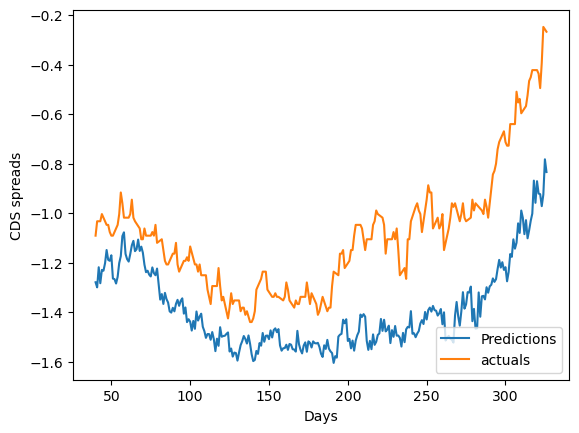

In [72]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('FNN results.png')

In [73]:
# for inverse transformation input
df_scaled_input_inversed = scaler_input.inverse_transform(df_scaled_input)


# for inverse transformation output
scaled_y_hat_lstm = scaler_output.inverse_transform(y_hat_lstm)

scaled_y_hat_gru = scaler_output.inverse_transform(y_hat_gru)

scaled_y_hat_con1d = scaler_output.inverse_transform(y_hat_conv1d)




In [74]:
scaled_y_hat_gru

array([[2.1151276],
       [2.1373265],
       [2.1511784],
       [2.1625695],
       [2.1411602],
       [2.1191275],
       [2.1032076],
       [2.0922627],
       [2.0898821],
       [2.1055787],
       [2.1517222],
       [2.1547613],
       [2.1519732],
       [2.150387 ],
       [2.1245697],
       [2.127692 ],
       [2.1040018],
       [2.0920494],
       [2.0879335],
       [2.0878372],
       [2.0884967],
       [2.0529635],
       [2.0519266],
       [2.0445616],
       [2.0557637],
       [2.056922 ],
       [2.0567598],
       [2.05679  ],
       [2.0297654],
       [2.0185683],
       [2.0049076],
       [1.9994359],
       [2.0025673],
       [2.0069528],
       [2.0185127],
       [2.0083776],
       [2.02653  ],
       [1.9985576],
       [2.0221567],
       [2.0197542],
       [2.0071318],
       [1.9955592],
       [2.0150108],
       [2.0190008],
       [2.0417526],
       [2.0304265],
       [2.0323257],
       [2.030234 ],
       [2.0253057],
       [2.0241692],


In [75]:
scaled_y_val = scaler_output.inverse_transform([y_val])

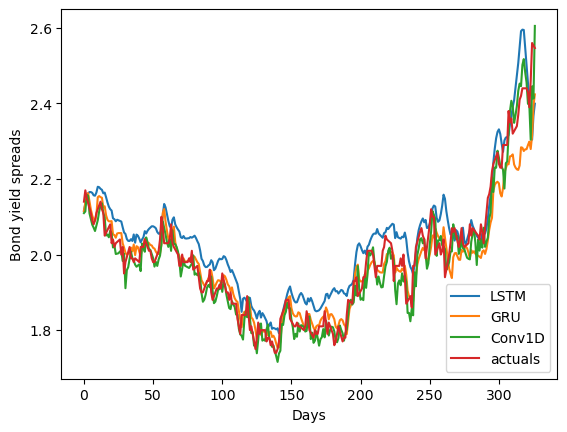

In [81]:
plt.plot(scaled_y_hat_lstm.flatten())
plt.plot(scaled_y_hat_gru.flatten())
plt.plot(scaled_y_hat_con1d.flatten())
plt.plot(scaled_y_val.flatten())

plt.legend(["LSTM","GRU","Conv1D", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('Bond yield spreads')
plt.savefig('allmodels.png')

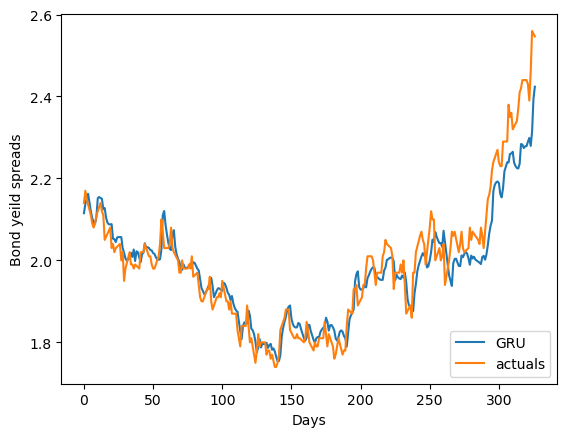

In [82]:
plt.plot(scaled_y_hat_gru.flatten())
plt.plot(scaled_y_val.flatten())
plt.legend(["GRU","actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('Bond yeild spreads')
plt.savefig('GRU scaled.png')